# Import

In [ ]:
!pip install scikit-plot

In [3]:
## Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import scikitplot as skplt
%matplotlib inline

In [4]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, plot_roc_curve, PrecisionRecallDisplay, plot_confusion_matrix

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [5]:
from google.colab import drive
drive.mount('/content/drive')
DATA_DIR="/content/drive/MyDrive/IAQF - Five+1 Guys/2022/Data"

Mounted at /content/drive


In [6]:
%run "/content/drive/MyDrive/IAQF - Five+1 Guys/2022/Colab/MLFramework.ipynb" import MLFramework

## Merge data version 4

In [7]:
datav4 = pd.read_csv(os.path.join(DATA_DIR, "Data_Version_4.csv"), index_col=0)
datav4.index = pd.to_datetime(datav4.index)
datav4

,PX_LAST,PX_VOLUME,T1M,T3M,T6M,T1Y,T3Y,T5Y,T10Y,T30Y,T10Y3M,T10Y2Y,LIBOR_3M,TEDRATE,InterestRate,WTI_Futures_Price,WTI_Futures_Return,WTI_Spot_Price,WTI_Spot_Change,Commdity_channel_index_13,Williams_pct_14,RSI_14,Parabolic_0.02_0.2_0.02,DMI_14_ADX,Fear_Greedy_Index,CPI_monthly percent change,CPI_Release,Unemployment_rate,Unemployment_Release,change_in_total_nonfarm_thousand,Nonfarm_Release,VIX_Close,GDP_QOQ_change,GDP_Release,SPY_Adj_Close,SPY_Volume,SP_Adj_Close,SP_Volume,Mkt-RF,SMB,HML,RF,Russell3000_Adj_Close,Russell3000_Volume
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1990-01-02,585.41,NaN,NaN,7.83,7.50,7.81,7.90,7.87,7.94,8.00,0.11,0.07,8.38000,0.80,8.54,22.89,0.0490,22.89,0.0490,158.6294,-0.8405,69.0585,190.157,17.2194,2.3009,0.3,0.0,5.4,0.0,276.0,0.0,17.240000,0.8,0.0,NaN,NaN,359.69,1.620700e+08,1.44,-0.68,-0.07,0.026,200.309998,0.0
1990-01-03,585.05,NaN,NaN,7.89,7.53,7.85,7.96,7.92,7.99,8.04,0.10,0.05,8.38000,0.75,8.37,23.68,0.0345,23.68,0.0345,166.5505,-6.7745,68.4778,190.767,18.4101,3.0652,0.3,0.0,5.4,0.0,276.0,0.0,18.190001,0.8,0.0,NaN,NaN,358.76,1.923300e+08,-0.06,0.74,-0.26,0.026,200.110001,0.0
1990-01-04,580.97,NaN,NaN,7.84,7.50,7.82,7.93,7.91,7.98,8.04,0.14,0.06,8.38000,0.79,8.29,23.41,-0.0114,23.41,-0.0114,104.2355,-19.9820,61.8875,191.575,18.1196,1.8271,0.3,0.0,5.4,0.0,276.0,0.0,19.219999,0.8,0.0,NaN,NaN,355.67,1.770000e+08,-0.71,0.42,-0.22,0.026,198.850006,0.0
1990-01-05,575.74,NaN,NaN,7.79,7.46,7.79,7.94,7.92,7.99,8.06,0.20,0.09,8.38000,0.84,8.20,23.08,-0.0141,23.08,-0.0141,56.8323,-36.1185,54.9317,192.319,17.4400,-0.2747,0.3,0.0,5.4,0.0,84.0,1.0,20.110001,0.8,0.0,NaN,NaN,352.20,1.585300e+08,-0.85,0.77,-0.21,0.026,196.860001,0.0
1990-01-08,577.78,NaN,NaN,7.79,7.49,7.81,7.95,7.92,8.02,8.09,0.23,0.12,8.38000,0.84,8.27,21.62,-0.0633,21.62,-0.0633,43.9596,-30.0539,56.8927,193.003,16.6146,-0.5619,0.3,0.0,5.4,0.0,84.0,0.0,20.260000,0.8,0.0,NaN,NaN,353.79,1.401100e+08,0.30,-0.41,-0.26,0.026,197.539993,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19,14547.22,1.322548e+09,0.05,0.17,0.36,0.57,1.33,1.62,1.83,2.14,1.66,0.79,0.25514,0.09,0.08,86.96,0.0179,85.58,-0.0135,-167.3056,-99.3827,32.9727,2780.178,21.6253,-124.8524,0.5,0.0,3.9,0.0,199.0,0.0,23.850000,2.3,0.0,451.750000,109357600.0,4532.76,3.387370e+09,-0.31,0.06,0.53,0.000,2633.860107,0.0
2022-01-20,14378.11,1.355285e+09,0.05,0.17,0.36,0.60,1.34,1.62,1.83,2.14,1.66,0.75,0.25886,0.08,0.08,86.90,-0.0007,84.67,-0.0106,-163.7336,-98.8126,29.7787,2768.382,23.3995,-171.7405,0.5,0.0,3.9,0.0,199.0,0.0,25.590000,2.3,0.0,446.750000,122379700.0,4482.73,3.473060e+09,-0.31,0.06,0.53,0.000,2603.060059,0.0
2022-01-21,14099.17,1.917342e+09,0.05,0.17,0.35,0.58,1.28,1.54,1.75,2.07,1.58,0.74,0.25771,0.09,0.08,85.14,-0.0203,85.43,0.0090,-191.9934,-99.7294,25.4267,2751.593,25.6026,-213.5388,0.5,0.0,3.9,0.0,199.0,0.0,28.850000,2.3,0.0,437.980011,202271200.0,4397.94,3.945810e+09,-0.31,0.06,0.53,0.000,2552.540039,0.0


In [8]:
label = pd.read_csv(os.path.join(DATA_DIR, "Label/label.csv"), index_col=0)
label.index = pd.to_datetime(label.index)
label

,PX_LAST,PX_VOLUME,RET,RET10,SIG10,SR10,POS_RET,POS_SR,State_RET,State_SR,State_RET_shifted,State_SR_shifted
Date,,,,,,,,,,,,
2000-01-03,2909.89,1748611000,-0.009045,0.007478,0.020033,1.866374,0,0,-1,-1,1,1
2000-01-04,2795.36,1805332000,-0.039359,0.052923,0.014184,18.656401,1,1,1,1,1,1
2000-01-05,2802.51,2100967000,0.002558,0.045370,0.014514,15.629273,1,1,1,1,1,1
2000-01-06,2784.07,1972651000,-0.006580,0.051195,0.014144,18.097667,1,1,1,1,1,1
2000-01-07,2878.11,2151953000,0.033778,-0.009656,0.013294,-3.631671,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19,14547.22,1322548409,-0.010110,-0.069665,0.010564,-32.974359,-1,-1,-1,-1,-1,-1
2022-01-20,14378.11,1355284526,-0.011625,-0.069665,0.010564,-32.974359,-1,-1,-1,-1,-1,-1
2022-01-21,14099.17,1917342177,-0.019400,-0.069665,0.010564,-32.974359,-1,-1,-1,-1,-1,-1


In [9]:
df = pd.merge(datav4, label[['POS_RET','POS_SR','State_RET_shifted','State_SR_shifted']], left_index=True, right_index=True, how='outer')
df

,PX_LAST,PX_VOLUME,T1M,T3M,T6M,T1Y,T3Y,T5Y,T10Y,T30Y,T10Y3M,T10Y2Y,LIBOR_3M,TEDRATE,InterestRate,WTI_Futures_Price,WTI_Futures_Return,WTI_Spot_Price,WTI_Spot_Change,Commdity_channel_index_13,Williams_pct_14,RSI_14,Parabolic_0.02_0.2_0.02,DMI_14_ADX,Fear_Greedy_Index,CPI_monthly percent change,CPI_Release,Unemployment_rate,Unemployment_Release,change_in_total_nonfarm_thousand,Nonfarm_Release,VIX_Close,GDP_QOQ_change,GDP_Release,SPY_Adj_Close,SPY_Volume,SP_Adj_Close,SP_Volume,Mkt-RF,SMB,HML,RF,Russell3000_Adj_Close,Russell3000_Volume,POS_RET,POS_SR,State_RET_shifted,State_SR_shifted
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1990-01-02,585.41,NaN,NaN,7.83,7.50,7.81,7.90,7.87,7.94,8.00,0.11,0.07,8.38000,0.80,8.54,22.89,0.0490,22.89,0.0490,158.6294,-0.8405,69.0585,190.157,17.2194,2.3009,0.3,0.0,5.4,0.0,276.0,0.0,17.240000,0.8,0.0,NaN,NaN,359.69,1.620700e+08,1.44,-0.68,-0.07,0.026,200.309998,0.0,NaN,NaN,NaN,NaN
1990-01-03,585.05,NaN,NaN,7.89,7.53,7.85,7.96,7.92,7.99,8.04,0.10,0.05,8.38000,0.75,8.37,23.68,0.0345,23.68,0.0345,166.5505,-6.7745,68.4778,190.767,18.4101,3.0652,0.3,0.0,5.4,0.0,276.0,0.0,18.190001,0.8,0.0,NaN,NaN,358.76,1.923300e+08,-0.06,0.74,-0.26,0.026,200.110001,0.0,NaN,NaN,NaN,NaN
1990-01-04,580.97,NaN,NaN,7.84,7.50,7.82,7.93,7.91,7.98,8.04,0.14,0.06,8.38000,0.79,8.29,23.41,-0.0114,23.41,-0.0114,104.2355,-19.9820,61.8875,191.575,18.1196,1.8271,0.3,0.0,5.4,0.0,276.0,0.0,19.219999,0.8,0.0,NaN,NaN,355.67,1.770000e+08,-0.71,0.42,-0.22,0.026,198.850006,0.0,NaN,NaN,NaN,NaN
1990-01-05,575.74,NaN,NaN,7.79,7.46,7.79,7.94,7.92,7.99,8.06,0.20,0.09,8.38000,0.84,8.20,23.08,-0.0141,23.08,-0.0141,56.8323,-36.1185,54.9317,192.319,17.4400,-0.2747,0.3,0.0,5.4,0.0,84.0,1.0,20.110001,0.8,0.0,NaN,NaN,352.20,1.585300e+08,-0.85,0.77,-0.21,0.026,196.860001,0.0,NaN,NaN,NaN,NaN
1990-01-08,577.78,NaN,NaN,7.79,7.49,7.81,7.95,7.92,8.02,8.09,0.23,0.12,8.38000,0.84,8.27,21.62,-0.0633,21.62,-0.0633,43.9596,-30.0539,56.8927,193.003,16.6146,-0.5619,0.3,0.0,5.4,0.0,84.0,0.0,20.260000,0.8,0.0,NaN,NaN,353.79,1.401100e+08,0.30,-0.41,-0.26,0.026,197.539993,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19,14547.22,1.322548e+09,0.05,0.17,0.36,0.57,1.33,1.62,1.83,2.14,1.66,0.79,0.25514,0.09,0.08,86.96,0.0179,85.58,-0.0135,-167.3056,-99.3827,32.9727,2780.178,21.6253,-124.8524,0.5,0.0,3.9,0.0,199.0,0.0,23.850000,2.3,0.0,451.750000,109357600.0,4532.76,3.387370e+09,-0.31,0.06,0.53,0.000,2633.860107,0.0,-1.0,-1.0,-1.0,-1.0
2022-01-20,14378.11,1.355285e+09,0.05,0.17,0.36,0.60,1.34,1.62,1.83,2.14,1.66,0.75,0.25886,0.08,0.08,86.90,-0.0007,84.67,-0.0106,-163.7336,-98.8126,29.7787,2768.382,23.3995,-171.7405,0.5,0.0,3.9,0.0,199.0,0.0,25.590000,2.3,0.0,446.750000,122379700.0,4482.73,3.473060e+09,-0.31,0.06,0.53,0.000,2603.060059,0.0,-1.0,-1.0,-1.0,-1.0
2022-01-21,14099.17,1.917342e+09,0.05,0.17,0.35,0.58,1.28,1.54,1.75,2.07,1.58,0.74,0.25771,0.09,0.08,85.14,-0.0203,85.43,0.0090,-191.9934,-99.7294,25.4267,2751.593,25.6026,-213.5388,0.5,0.0,3.9,0.0,199.0,0.0,28.850000,2.3,0.0,437.980011,202271200.0,4397.94,3.945810e+09,-0.31,0.06,0.53,0.000,2552.540039,0.0,-1.0,-1.0,-1.0,-1.0


In [10]:
label_hmm = pd.read_csv(os.path.join(DATA_DIR, "Label/label by hmm1 v2.csv"), index_col=0)
label_hmm.index = pd.to_datetime(label_hmm.index)
label_hmm

,hmm1,hmm1_MA5,hmm1_MA10,hmm1_MA15,hmm1_EWMA5,hmm1_EWMA10,hmm1_EWMA15
Date,,,,,,,
1990-01-23,0,0,-1,0,0,-1,-1
1990-01-24,1,-1,-1,0,-1,-1,-1
1990-01-25,0,-1,-1,0,-1,-1,-1
1990-01-26,1,-1,-1,0,-1,-1,-1
1990-01-29,1,-1,-1,0,-1,-1,-1
...,...,...,...,...,...,...,...
2022-01-19,-1,-1,-1,0,-1,-1,-1
2022-01-20,-1,-1,-1,0,-1,-1,-1
2022-01-21,-1,-1,-1,0,-1,-1,-1


In [11]:
label_hmm1 = label_hmm.shift(-1)
label_hmm1.columns = [f"{col}_shifted" for col in label_hmm.columns]
label_hmm1

,hmm1_shifted,hmm1_MA5_shifted,hmm1_MA10_shifted,hmm1_MA15_shifted,hmm1_EWMA5_shifted,hmm1_EWMA10_shifted,hmm1_EWMA15_shifted
Date,,,,,,,
1990-01-23,1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0
1990-01-24,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0
1990-01-25,1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0
1990-01-26,1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0
1990-01-29,1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...
2022-01-19,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0
2022-01-20,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0
2022-01-21,0.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0


In [12]:
df_all = pd.merge(df, label_hmm, left_index=True, right_index=True, how='outer')
df_all

,PX_LAST,PX_VOLUME,T1M,T3M,T6M,T1Y,T3Y,T5Y,T10Y,T30Y,T10Y3M,T10Y2Y,LIBOR_3M,TEDRATE,InterestRate,WTI_Futures_Price,WTI_Futures_Return,WTI_Spot_Price,WTI_Spot_Change,Commdity_channel_index_13,Williams_pct_14,RSI_14,Parabolic_0.02_0.2_0.02,DMI_14_ADX,Fear_Greedy_Index,CPI_monthly percent change,CPI_Release,Unemployment_rate,Unemployment_Release,change_in_total_nonfarm_thousand,Nonfarm_Release,VIX_Close,GDP_QOQ_change,GDP_Release,SPY_Adj_Close,SPY_Volume,SP_Adj_Close,SP_Volume,Mkt-RF,SMB,HML,RF,Russell3000_Adj_Close,Russell3000_Volume,POS_RET,POS_SR,State_RET_shifted,State_SR_shifted,hmm1,hmm1_MA5,hmm1_MA10,hmm1_MA15,hmm1_EWMA5,hmm1_EWMA10,hmm1_EWMA15
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1990-01-02,585.41,NaN,NaN,7.83,7.50,7.81,7.90,7.87,7.94,8.00,0.11,0.07,8.38000,0.80,8.54,22.89,0.0490,22.89,0.0490,158.6294,-0.8405,69.0585,190.157,17.2194,2.3009,0.3,0.0,5.4,0.0,276.0,0.0,17.240000,0.8,0.0,NaN,NaN,359.69,1.620700e+08,1.44,-0.68,-0.07,0.026,200.309998,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,585.05,NaN,NaN,7.89,7.53,7.85,7.96,7.92,7.99,8.04,0.10,0.05,8.38000,0.75,8.37,23.68,0.0345,23.68,0.0345,166.5505,-6.7745,68.4778,190.767,18.4101,3.0652,0.3,0.0,5.4,0.0,276.0,0.0,18.190001,0.8,0.0,NaN,NaN,358.76,1.923300e+08,-0.06,0.74,-0.26,0.026,200.110001,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,580.97,NaN,NaN,7.84,7.50,7.82,7.93,7.91,7.98,8.04,0.14,0.06,8.38000,0.79,8.29,23.41,-0.0114,23.41,-0.0114,104.2355,-19.9820,61.8875,191.575,18.1196,1.8271,0.3,0.0,5.4,0.0,276.0,0.0,19.219999,0.8,0.0,NaN,NaN,355.67,1.770000e+08,-0.71,0.42,-0.22,0.026,198.850006,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,575.74,NaN,NaN,7.79,7.46,7.79,7.94,7.92,7.99,8.06,0.20,0.09,8.38000,0.84,8.20,23.08,-0.0141,23.08,-0.0141,56.8323,-36.1185,54.9317,192.319,17.4400,-0.2747,0.3,0.0,5.4,0.0,84.0,1.0,20.110001,0.8,0.0,NaN,NaN,352.20,1.585300e+08,-0.85,0.77,-0.21,0.026,196.860001,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,577.78,NaN,NaN,7.79,7.49,7.81,7.95,7.92,8.02,8.09,0.23,0.12,8.38000,0.84,8.27,21.62,-0.0633,21.62,-0.0633,43.9596,-30.0539,56.8927,193.003,16.6146,-0.5619,0.3,0.0,5.4,0.0,84.0,0.0,20.260000,0.8,0.0,NaN,NaN,353.79,1.401100e+08,0.30,-0.41,-0.26,0.026,197.539993,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19,14547.22,1.322548e+09,0.05,0.17,0.36,0.57,1.33,1.62,1.83,2.14,1.66,0.79,0.25514,0.09,0.08,86.96,0.0179,85.58,-0.0135,-167.3056,-99.3827,32.9727,2780.178,21.6253,-124.8524,0.5,0.0,3.9,0.0,199.0,0.0,23.850000,2.3,0.0,451.750000,109357600.0,4532.76,3.387370e+09,-0.31,0.06,0.53,0.000,2633.860107,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0
2022-01-20,14378.11,1.355285e+09,0.05,0.17,0.36,0.60,1.34,1.62,1.83,2.14,1.66,0.75,0.25886,0.08,0.08,86.90,-0.0007,84.67,-0.0106,-163.7336,-98.8126,29.7787,2768.382,23.3995,-171.7405,0.5,0.0,3.9,0.0,199.0,0.0,25.590000,2.3,0.0,446.750000,122379700.0,4482.73,3.473060e+09,-0.31,0.06,0.53,0.000,2603.060059,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0
2022-01-21,14099.17,1.917342e+09,0.05,0.17,0.35,0.58,1.28,1.54,1.75,2.07,1.58,0.74,0.25771,0.09,0.08,85.14,-0.0203,85.43,0.0090,-191.9934,-99.7294,25.4267,2751.593,25.6026,-213.5388,0.5,0.0,3.9,0.0,199.0,0.0,28.850000,2.3,0.0,437.980011,202271200.0,4397.94,3.945810e+09,-0.31,0.06,0.53,0.000,2552.540039,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0


In [13]:
df.to_csv(os.path.join(DATA_DIR, "Label/data_v4_label.csv"))

In [14]:
df_all.to_csv(os.path.join(DATA_DIR, "Label/master_ds_v3.csv"))

## Load Data

In [15]:
df = pd.read_csv(os.path.join(DATA_DIR, "Label/master_ds_v4.csv"), index_col=0)
df.index = pd.to_datetime(df.index)
# df['SMA5'] = df['Russell_Close'].rolling(5, min_periods=1).mean()
# df['log_ret'] = np.log(df['Russell_Close'] / df['Russell_Close'].shift(1))
df

,PX_LAST,PX_VOLUME,T1M,T3M,T6M,T1Y,T3Y,T5Y,T10Y,T30Y,T10Y3M,T10Y2Y,LIBOR_3M,TEDRATE,InterestRate,WTI_Futures_Price,WTI_Futures_Return,WTI_Spot_Price,WTI_Spot_Change,Commdity_channel_index_13,Williams_pct_14,RSI_14,Parabolic_0.02_0.2_0.02,DMI_14_ADX,Fear_Greedy_Index,CPI_monthly percent change,CPI_Release,Unemployment_rate,Unemployment_Release,change_in_total_nonfarm_thousand,Nonfarm_Release,VIX_Close,GDP_QOQ_change,GDP_Release,SPY_Adj_Close,SPY_Volume,SP_Adj_Close,SP_Volume,Mkt-RF,SMB,...,month_7,month_8,month_9,month_10,month_11,month_12,PX_Ret,VIX_Close_Diff,Mkt-RF_Diff,SMB_Diff,HML_Diff,RF_Diff,T1M_Diff,T3M_Diff,T6M_Diff,T1Y_Diff,T3Y_Diff,T5Y_Diff,T10Y_Diff,T30Y_Diff,T10Y3M_Diff,T10Y2Y_Diff,LIBOR_3M_Diff,TEDRATE_Diff,InterestRate_Diff,PX_EMA5,PX_EMA10,PX_EMA5_BB_hband,PX_EMA5_BB_lband,PX_EMA5_BB_pband,PX_KAMA10,PX_EMA5_RSI,PX_EMA5_MACD,PX_EMA5_MACD_Diff,PX_EMA5_MACD_Sig,PX_EMA5_VPT,PX_EMA5_FI,PX_EMA5_KST,PX_EMA5_KST_Diff,PX_EMA5_KST_Sig
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1990-01-02,585.41,NaN,NaN,7.83,7.50,7.81,7.90,7.87,7.94,8.00,0.11,0.07,8.38000,0.80,8.54,22.89,0.0490,22.89,0.0490,158.6294,-0.8405,69.0585,190.157,17.2194,2.3009,0.3,0.0,5.4,0.0,276.0,0.0,17.240000,0.8,0.0,NaN,NaN,359.69,1.620700e+08,1.44,-0.68,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,585.05,NaN,NaN,7.89,7.53,7.85,7.96,7.92,7.99,8.04,0.10,0.05,8.38000,0.75,8.37,23.68,0.0345,23.68,0.0345,166.5505,-6.7745,68.4778,190.767,18.4101,3.0652,0.3,0.0,5.4,0.0,276.0,0.0,18.190001,0.8,0.0,NaN,NaN,358.76,1.923300e+08,-0.06,0.74,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.000615,0.950001,-1.50,1.42,-0.19,0.0,NaN,0.06,0.03,0.04,0.06,0.05,0.05,0.04,-0.01,-0.02,0.00000,-0.05,-0.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,580.97,NaN,NaN,7.84,7.50,7.82,7.93,7.91,7.98,8.04,0.14,0.06,8.38000,0.79,8.29,23.41,-0.0114,23.41,-0.0114,104.2355,-19.9820,61.8875,191.575,18.1196,1.8271,0.3,0.0,5.4,0.0,276.0,0.0,19.219999,0.8,0.0,NaN,NaN,355.67,1.770000e+08,-0.71,0.42,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.006998,1.029998,-0.65,-0.32,0.04,0.0,NaN,-0.05,-0.03,-0.03,-0.03,-0.01,-0.01,0.00,0.04,0.01,0.00000,0.04,-0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,575.74,NaN,NaN,7.79,7.46,7.79,7.94,7.92,7.99,8.06,0.20,0.09,8.38000,0.84,8.20,23.08,-0.0141,23.08,-0.0141,56.8323,-36.1185,54.9317,192.319,17.4400,-0.2747,0.3,0.0,5.4,0.0,84.0,1.0,20.110001,0.8,0.0,NaN,NaN,352.20,1.585300e+08,-0.85,0.77,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.009043,0.890002,-0.14,0.35,0.01,0.0,NaN,-0.05,-0.04,-0.03,0.01,0.01,0.01,0.02,0.06,0.03,0.00000,0.05,-0.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,577.78,NaN,NaN,7.79,7.49,7.81,7.95,7.92,8.02,8.09,0.23,0.12,8.38000,0.84,8.27,21.62,-0.0633,21.62,-0.0633,43.9596,-30.0539,56.8927,193.003,16.6146,-0.5619,0.3,0.0,5.4,0.0,84.0,0.0,20.260000,0.8,0.0,NaN,NaN,353.79,1.401100e+08,0.30,-0.41,...,0.0,0.0,0.0,0.0,0.0,0.0,0.003537,0.149999,1.15,-1.18,-0.05,0.0,NaN,0.00,0.03,0.02,0.01,0.00,0.03,0.03,0.03,0.03,0.00000,0.00,0.07,580.024444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19,14547.22,1.322548e+09,0.05,0.17,0.36,0.57,1.33,1.62,1.83,2.14,1.66,0.79,0.25514,0.09,0.08,86.96,0.0179,85.58,-0.0135,-167.3056,-99.3827,32.9727,2780.178,21.6253,-124.8524,0.5,0.0,3.9,0.0,199.0,0.0,23.850000,2.3,0.0,451.750000,109357600.0,4532.76,3.387370e+09,-0.31,0.06,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.010162,1.059999,0.00,0.00,0.00,0.0,0.0,0.01,-0.01,-0.01,-0.02,-0.03,-0.04,-0.04,-0.05,-0.02,0.00114,0.01,0.00,14811.486

In [16]:
df.isna().any()

PX_LAST             False
PX_VOLUME            True
T1M                  True
T3M                 False
T6M                 False
                    ...  
PX_EMA5_VPT          True
PX_EMA5_FI           True
PX_EMA5_KST          True
PX_EMA5_KST_Diff     True
PX_EMA5_KST_Sig      True
Length: 167, dtype: bool

In [17]:
df = df.fillna(0)
df = df.replace((np.inf, -np.inf), 0)

In [18]:
data = df.copy()

## Check labels

In [19]:
data['log_ret'].mul(data['POS_SR']).cumsum().plot()

KeyError: ignored

In [ ]:
data['log_ret'].mul(data['State_SR_shifted']).cumsum().plot()

In [ ]:
df['log_ret'].cumsum().plot()

In [ ]:
def duration(label):

  duration_bull = []
  duration_static = []
  duration_bear = []

  count,prev = 1,1

  for i in label:
    if i == prev:
      count+=1
    else:
      if prev == 1:
        duration_bull.append(count)
        count = 1
      elif prev == 0:
        duration_static.append(count)
        count = 1
      else:
        duration_bear.append(count)
        count = 1
    prev = i
    
  if prev == 1:
    duration_bull.append(count)
  elif prev == 0:
    duration_static.append(count)
  else:
    duration_bear.append(count)

  duration_bull = pd.DataFrame(duration_bull)
  duration_static = pd.DataFrame(duration_static)
  duration_bear = pd.DataFrame(duration_bear)

  return duration_bull, duration_static, duration_bear

In [ ]:
drtbull, drtstatic, durbear = duration(data['POS_SR'].values)

In [ ]:
drtbull.describe()

In [ ]:
drtstatic.describe()

In [ ]:
durbear.describe()

# Data Version 4

In [20]:
df = pd.read_csv(os.path.join(DATA_DIR, "Label/master_ds_v4.csv"), index_col=0)
df.index = pd.to_datetime(df.index)
df

,PX_LAST,PX_VOLUME,T1M,T3M,T6M,T1Y,T3Y,T5Y,T10Y,T30Y,T10Y3M,T10Y2Y,LIBOR_3M,TEDRATE,InterestRate,WTI_Futures_Price,WTI_Futures_Return,WTI_Spot_Price,WTI_Spot_Change,Commdity_channel_index_13,Williams_pct_14,RSI_14,Parabolic_0.02_0.2_0.02,DMI_14_ADX,Fear_Greedy_Index,CPI_monthly percent change,CPI_Release,Unemployment_rate,Unemployment_Release,change_in_total_nonfarm_thousand,Nonfarm_Release,VIX_Close,GDP_QOQ_change,GDP_Release,SPY_Adj_Close,SPY_Volume,SP_Adj_Close,SP_Volume,Mkt-RF,SMB,...,month_7,month_8,month_9,month_10,month_11,month_12,PX_Ret,VIX_Close_Diff,Mkt-RF_Diff,SMB_Diff,HML_Diff,RF_Diff,T1M_Diff,T3M_Diff,T6M_Diff,T1Y_Diff,T3Y_Diff,T5Y_Diff,T10Y_Diff,T30Y_Diff,T10Y3M_Diff,T10Y2Y_Diff,LIBOR_3M_Diff,TEDRATE_Diff,InterestRate_Diff,PX_EMA5,PX_EMA10,PX_EMA5_BB_hband,PX_EMA5_BB_lband,PX_EMA5_BB_pband,PX_KAMA10,PX_EMA5_RSI,PX_EMA5_MACD,PX_EMA5_MACD_Diff,PX_EMA5_MACD_Sig,PX_EMA5_VPT,PX_EMA5_FI,PX_EMA5_KST,PX_EMA5_KST_Diff,PX_EMA5_KST_Sig
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1990-01-02,585.41,NaN,NaN,7.83,7.50,7.81,7.90,7.87,7.94,8.00,0.11,0.07,8.38000,0.80,8.54,22.89,0.0490,22.89,0.0490,158.6294,-0.8405,69.0585,190.157,17.2194,2.3009,0.3,0.0,5.4,0.0,276.0,0.0,17.240000,0.8,0.0,NaN,NaN,359.69,1.620700e+08,1.44,-0.68,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,585.05,NaN,NaN,7.89,7.53,7.85,7.96,7.92,7.99,8.04,0.10,0.05,8.38000,0.75,8.37,23.68,0.0345,23.68,0.0345,166.5505,-6.7745,68.4778,190.767,18.4101,3.0652,0.3,0.0,5.4,0.0,276.0,0.0,18.190001,0.8,0.0,NaN,NaN,358.76,1.923300e+08,-0.06,0.74,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.000615,0.950001,-1.50,1.42,-0.19,0.0,NaN,0.06,0.03,0.04,0.06,0.05,0.05,0.04,-0.01,-0.02,0.00000,-0.05,-0.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,580.97,NaN,NaN,7.84,7.50,7.82,7.93,7.91,7.98,8.04,0.14,0.06,8.38000,0.79,8.29,23.41,-0.0114,23.41,-0.0114,104.2355,-19.9820,61.8875,191.575,18.1196,1.8271,0.3,0.0,5.4,0.0,276.0,0.0,19.219999,0.8,0.0,NaN,NaN,355.67,1.770000e+08,-0.71,0.42,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.006998,1.029998,-0.65,-0.32,0.04,0.0,NaN,-0.05,-0.03,-0.03,-0.03,-0.01,-0.01,0.00,0.04,0.01,0.00000,0.04,-0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,575.74,NaN,NaN,7.79,7.46,7.79,7.94,7.92,7.99,8.06,0.20,0.09,8.38000,0.84,8.20,23.08,-0.0141,23.08,-0.0141,56.8323,-36.1185,54.9317,192.319,17.4400,-0.2747,0.3,0.0,5.4,0.0,84.0,1.0,20.110001,0.8,0.0,NaN,NaN,352.20,1.585300e+08,-0.85,0.77,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.009043,0.890002,-0.14,0.35,0.01,0.0,NaN,-0.05,-0.04,-0.03,0.01,0.01,0.01,0.02,0.06,0.03,0.00000,0.05,-0.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,577.78,NaN,NaN,7.79,7.49,7.81,7.95,7.92,8.02,8.09,0.23,0.12,8.38000,0.84,8.27,21.62,-0.0633,21.62,-0.0633,43.9596,-30.0539,56.8927,193.003,16.6146,-0.5619,0.3,0.0,5.4,0.0,84.0,0.0,20.260000,0.8,0.0,NaN,NaN,353.79,1.401100e+08,0.30,-0.41,...,0.0,0.0,0.0,0.0,0.0,0.0,0.003537,0.149999,1.15,-1.18,-0.05,0.0,NaN,0.00,0.03,0.02,0.01,0.00,0.03,0.03,0.03,0.03,0.00000,0.00,0.07,580.024444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-19,14547.22,1.322548e+09,0.05,0.17,0.36,0.57,1.33,1.62,1.83,2.14,1.66,0.79,0.25514,0.09,0.08,86.96,0.0179,85.58,-0.0135,-167.3056,-99.3827,32.9727,2780.178,21.6253,-124.8524,0.5,0.0,3.9,0.0,199.0,0.0,23.850000,2.3,0.0,451.750000,109357600.0,4532.76,3.387370e+09,-0.31,0.06,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.010162,1.059999,0.00,0.00,0.00,0.0,0.0,0.01,-0.01,-0.01,-0.02,-0.03,-0.04,-0.04,-0.05,-0.02,0.00114,0.01,0.00,14811.486

In [21]:
data = df.copy()
data = data[(data.index>'2002-01-01')&(data.index<'2022-01-25')]
data

,PX_LAST,PX_VOLUME,T1M,T3M,T6M,T1Y,T3Y,T5Y,T10Y,T30Y,T10Y3M,T10Y2Y,LIBOR_3M,TEDRATE,InterestRate,WTI_Futures_Price,WTI_Futures_Return,WTI_Spot_Price,WTI_Spot_Change,Commdity_channel_index_13,Williams_pct_14,RSI_14,Parabolic_0.02_0.2_0.02,DMI_14_ADX,Fear_Greedy_Index,CPI_monthly percent change,CPI_Release,Unemployment_rate,Unemployment_Release,change_in_total_nonfarm_thousand,Nonfarm_Release,VIX_Close,GDP_QOQ_change,GDP_Release,SPY_Adj_Close,SPY_Volume,SP_Adj_Close,SP_Volume,Mkt-RF,SMB,...,month_7,month_8,month_9,month_10,month_11,month_12,PX_Ret,VIX_Close_Diff,Mkt-RF_Diff,SMB_Diff,HML_Diff,RF_Diff,T1M_Diff,T3M_Diff,T6M_Diff,T1Y_Diff,T3Y_Diff,T5Y_Diff,T10Y_Diff,T30Y_Diff,T10Y3M_Diff,T10Y2Y_Diff,LIBOR_3M_Diff,TEDRATE_Diff,InterestRate_Diff,PX_EMA5,PX_EMA10,PX_EMA5_BB_hband,PX_EMA5_BB_lband,PX_EMA5_BB_pband,PX_KAMA10,PX_EMA5_RSI,PX_EMA5_MACD,PX_EMA5_MACD_Diff,PX_EMA5_MACD_Sig,PX_EMA5_VPT,PX_EMA5_FI,PX_EMA5_KST,PX_EMA5_KST_Diff,PX_EMA5_KST_Sig
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-01-02,2418.16,2.344382e+09,1.73,1.74,1.81,2.28,3.75,4.52,5.20,5.56,3.46,1.98,1.86000,0.15,1.92,21.01,0.0590,20.06,0.0111,39.5466,-17.9055,56.9590,614.690,11.2783,20.6646,-0.3,0.0,5.3,0.0,-312.0,0.0,22.709999,-1.6,0.0,78.741356,18651900.0,1154.67,1.171000e+09,0.42,-0.64,...,0.0,0.0,0.0,0.0,0.0,0.0,0.005025,-1.090000,1.46,-0.82,-0.64,0.0,0.05,0.00,0.02,0.11,0.16,0.14,0.13,0.08,0.13,-0.02,-0.02000,-0.02,0.40,2413.828716,2406.353895,2423.692805,2361.594313,0.841154,2397.891657,68.802626,16.689033,-0.292420,16.981453,-2.136852e+05,5.822147e+09,21.975458,-4.117875,26.093332
2002-01-03,2442.57,3.160795e+09,1.73,1.73,1.78,2.24,3.71,4.48,5.16,5.54,3.43,1.97,1.88000,0.18,1.72,20.37,-0.0305,20.77,0.0354,127.2062,-0.1199,61.2367,615.820,11.0575,23.8914,-0.3,0.0,5.3,0.0,-312.0,0.0,21.340000,-1.6,0.0,79.634209,15743000.0,1165.27,1.398900e+09,0.99,0.85,...,0.0,0.0,0.0,0.0,0.0,0.0,0.010044,-1.369999,0.57,1.49,-0.57,0.0,0.00,-0.01,-0.03,-0.04,-0.04,-0.04,-0.04,-0.02,-0.03,-0.01,0.02000,0.03,-0.20,2423.409144,2412.938642,2427.624629,2362.650450,0.935121,2401.078465,71.817647,17.468429,0.389581,17.078848,1.465034e+07,9.316379e+09,22.047590,-2.746845,24.794435
2002-01-04,2459.80,3.289117e+09,1.72,1.72,1.78,2.25,3.72,4.50,5.18,5.57,3.46,1.99,1.87000,0.18,1.61,21.62,0.0614,21.18,0.0197,176.4276,-4.5618,63.9613,617.492,11.5112,28.4725,-0.3,0.0,5.3,0.0,-160.0,1.0,20.450001,-1.6,0.0,80.165848,20140700.0,1172.51,1.513000e+09,0.70,0.10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.007029,-0.889999,-0.29,-0.75,0.79,0.0,-0.01,-0.01,0.00,0.01,0.01,0.02,0.02,0.03,0.03,0.02,-0.01000,0.00,-0.11,2435.539429,2421.458889,2434.074754,2360.153298,1.019814,2405.816616,75.099047,18.847655,1.415045,17.432610,2.900867e+07,1.368517e+10,21.851281,-1.904816,23.756097
2002-01-07,2442.45,3.019993e+09,1.70,1.68,1.73,2.19,3.61,4.39,5.09,5.49,3.41,2.01,1.87000,0.21,1.61,21.48,-0.0065,21.38,0.0094,133.1437,-22.2527,59.4282,620.091,11.9978,25.5654,-0.3,0.0,5.3,0.0,-160.0,0.0,21.940001,-1.6,0.0,79.600151,13106500.0,1164.89,1.308300e+09,-0.70,-0.43,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.007078,1.490000,-1.40,-0.53,0.46,0.0,-0.02,-0.04,-0.05,-0.06,-0.11,-0.11,-0.09,-0.08,-0.05,0.02,0.00000,0.03,0.00,2437.842953,2425.275454,2439.228232,2357.800136,0.982988,2409.304277,75.678188,19.897214,1.971683,17.925531,1.931985e+07,1.272395e+10,21.822583,-1.180675,23.003259
2002-01-08,2437.00,2.692446e+09,1.70,1.68,1.74,2.19,3.60,4.39,5.10,5.51,3.42,2.03,1.84000,0.19,1.61,21.25,-0.0107,21.23,-0.0070,69.0855,-34.7333,57.8837,623.144,11.9570,19.5850,-0.3,0.0,5.3,0.0,-160.0,0.0,21.830000,-1.6,0.0,79.416107,12683700.0,1160.71,1.258800e+09,-0.23,1.17,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.002234,-0.110001,0.47,1.60,-0.56,0.0,0.00,0.00,0.01,0.00,-0.01,0.00,0.01,0.02,0.01,0.02,-0.03000,-0.02,0.00,2437.561969,2427.407190,2443.478956,2355.988290,0.932370,2410.939650,75.447679,20.470354,2.035859,18.434495,2.545968e+06,1.079817e+10,21.916955,-0.581757,22.498711
...,...,...,...,...,...,...,...,...,...,...,...,...

In [22]:
data.isna().sum().sum()

0

# Create Models

In [23]:
all_list = list(data.columns)
target_list = ['POS_RET', 'POS_SR', 'State_RET_shifted', 'State_SR_shifted', 'hmm1_shifted', 'hmm1_MA5_shifted', 'hmm1_MA10_shifted', 'hmm1_MA15_shifted', 'hmm1_EWMA5_shifted', 'hmm1_EWMA10_shifted', 'hmm1_EWMA15_shifted', \
               'hmm2_shifted', 'hmm2_MA5_shifted', 'hmm2_MA10_shifted', 'hmm2_MA15_shifted', 'hmm2_EWMA5_shifted', 'hmm2_EWMA10_shifted', 'hmm2_EWMA15_shifted']
# X = data[~data.columns[data.columns.isin(target_list)]]
# y = df[target_list]
# X.shape
X = data[data.columns[~data.columns.isin(target_list)]]
y = data[target_list]
var_list = list(X.columns)
y.shape

(5053, 18)

In [24]:
target_var = 'POS_SR'
features = var_list

In [25]:
scaler = StandardScaler()
model_rnf = Pipeline(steps = [('scaler', scaler), ('rnf', RandomForestClassifier(max_depth=3, random_state=825, class_weight='balanced'))])
ML_trial = MLFramework(target_var=target_var, features=features, df=data)
ML_trial.standardFlow(model = model_rnf)

CV Score:  [0.3099851  0.35171386 0.37704918 0.37406855 0.39195231]
Insample Result:  0.5471464019851117
Outsample Result:  0.46725317693059626
Remark: model is fitted with the whole trainning dataset 


#  Test methods

test 4 models, and 18 labels.

In [124]:
scaler = StandardScaler()
model_rnf = Pipeline(steps=[('scaler', scaler), ('rnf', RandomForestClassifier(n_estimators=100, max_depth=3, class_weight='balanced'))]) # set max_depth=3 to restrict overfitting
model_gb = Pipeline(steps=[('scaler', scaler), ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3))])
model_ab = Pipeline(steps=[('scaler', scaler), ('ab', AdaBoostClassifier(n_estimators=50, learning_rate=1.0))]) # base_estimator: DecisionTreeEstimator with max_depth=1
# model_nb = Pipeline(steps=[('scaler', scaler), ('nb', GaussianNB())])
model_svc = Pipeline(steps=[('scaler', scaler), ('svc', SVC(kernel='rbf', C=1.0, class_weight='balanced'))])
# model_list = [model_rnf, model_gb, model_nb, model_svc]
model_list = [model_rnf, model_gb, model_ab, model_svc]

In [27]:
for target_var in target_list:
  for model in model_list:
    print(f'Label: {target_var}\nModel: {model}')
    ML_trial = MLFramework(target_var=target_var, features=features, df=data)
    ML_trial.standardFlow(model = model, metric_CV = "balanced_accuracy")
    print('\n')

Label: POS_RET
Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('rnf',
                 RandomForestClassifier(class_weight='balanced', max_depth=3))])
CV Score:  [0.32534499 0.40987958 0.48841449 0.43662038 0.38223982]
Insample Result:  0.5399503722084368
Outsample Result:  0.2590420332355816
Remark: model is fitted with the whole trainning dataset 


Label: POS_RET
Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('gb', GradientBoostingClassifier())])
CV Score:  [0.31951926 0.30479659 0.34280969 0.40234452 0.31379227]
Insample Result:  0.8818858560794045
Outsample Result:  0.4144672531769306
Remark: model is fitted with the whole trainning dataset 


Label: POS_RET
Model: Pipeline(steps=[('scaler', StandardScaler()), ('gb', AdaBoostClassifier())])
CV Score:  [0.33333333 0.30554187 0.38935675 0.38100064 0.39049551]
Insample Result:  0.6439205955334988
Outsample Result:  0.46920821114369504
Remark: model is fitted with the whole trainning datase

hmm labels have highes cv scores.  
gradient boosting, svm: overfitting

# Train parameters

1. target var & model  
2. hyperparameter grid search  
3. relplot: relationship between parameters and results  
4. Set best parameters. Plot roc_auc curve and precision_recall curve.  
5. plot confusion matrix  
6. feature importances

In [72]:
def plot_ConfusionMatrix(MLobj):
  disp1 = ConfusionMatrixDisplay.from_estimator(MLobj.model, MLobj.X_train, MLobj.y_train, cmap=plt.cm.Blues,)
  print("Insample: ")
  print(disp1.confusion_matrix)

  disp2 = ConfusionMatrixDisplay.from_estimator(MLobj.model, MLobj.X_test, MLobj.y_test, cmap=plt.cm.Blues,)
  print("Outsample: ")
  print(disp2.confusion_matrix)

In [71]:
def plot_FeatureImportance(MLobj):
  importances = MLobj.model.steps[1][1].feature_importances_
  forest_importances = pd.Series(importances, index=MLobj.X_train.columns)
  std = np.std([tree.feature_importances_ for tree in MLobj.model.steps[1][1].estimators_], axis=0)

  fig = plt.figure(figsize=(30,12))
  ax = fig.add_subplot(111)
  forest_importances.plot.bar(yerr=std, ax=ax)
  ax.set_title("Feature importances (Mean Decrease in Impurity)")
  ax.set_ylabel("Mean decrease in impurity")
  fig.tight_layout()

  return forest_importances

## Model1: POS_SR, random forest

### 1.1 target var & model

In [84]:
target_var = 'POS_SR'
features = var_list

scaler = StandardScaler()
model_rnf = Pipeline(steps = [('scaler', scaler), ('rnf', RandomForestClassifier(n_estimators=100, max_depth=3, class_weight='balanced'))])
ML_trial1 = MLFramework(target_var=target_var, features=features, df=data)
ML_trial1.standardFlow(model = model_rnf, metric_CV = "balanced_accuracy")

CV Score:  [0.31672146 0.35992551 0.39249984 0.33502783 0.38409005]
Insample Result:  0.5632754342431762
Outsample Result:  0.4731182795698925
Remark: model is fitted with the whole trainning dataset 


### 1.2 grid search

In [75]:
params = dict(rnf__n_estimators = np.arange(20,501,50), rnf__max_depth = np.arange(2,5))
result_rnf1 = ML_trial1.gridSearch_TS(parameters=params, metric_CV='balanced_accuracy') # auc

Best param from Grid Search: {'rnf__max_depth': 4, 'rnf__n_estimators': 20}
CV score for the best param: 0.38088393542454824


In [76]:
result_rnf1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rnf__max_depth,param_rnf__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.079965,0.021588,0.008298,0.000450,2,20,"{'rnf__max_depth': 2, 'rnf__n_estimators': 20}",0.328281,0.372517,0.407916,0.301319,0.322524,0.346512,0.038463,30
1,0.230130,0.060846,0.015109,0.001579,2,70,"{'rnf__max_depth': 2, 'rnf__n_estimators': 70}",0.326829,0.312713,0.432715,0.316717,0.368337,0.351462,0.045172,29
2,0.381833,0.099994,0.022801,0.004082,2,120,"{'rnf__max_depth': 2, 'rnf__n_estimators': 120}",0.333333,0.349239,0.424848,0.306270,0.391923,0.361123,0.042266,15
3,0.546031,0.149695,0.026558,0.000408,2,170,"{'rnf__max_depth': 2, 'rnf__n_estimators': 170}",0.333333,0.349668,0.436843,0.324878,0.377614,0.364467,0.040415,12
4,0.705236,0.205348,0.036783,0.006858,2,220,"{'rnf__max_depth': 2, 'rnf__n_estimators': 220}",0.322996,0.351675,0.423617,0.305060,0.366461,0.353962,0.040899,28
5,0.850609,0.230699,0.039748,0.001371,2,270,"{'rnf__max_depth': 2, 'rnf__n_estimators': 270}",0.322879,0.375204,0.419377,0.281787,0.386546,0.357159,0.048819,25
6,1.002490,0.276550,0.047107,0.002446,2,320,"{'rnf__max_depth': 2, 'rnf__n_estimators': 320}",0.328455,0.361957,0.425580,0.315421,0.393187,0.364920,0.040663,10
7,1.155936,0.319297,0.051186,0.000759,2,370,"{'rnf__max_depth': 2, 'rnf__n_estimators': 370}",0.321253,0.345107,0.418877,0.326334,0.390272,0.360369,0.038049,21
8,1.343559,0.370951,0.058517,0.001200,2,420,"{'rnf__max_depth': 2, 'rnf__n_estimators': 420}",0.323577,0.355210,0.404007,0.318675,0.404017,0.361097,0.037217,16
9,1.614640,0.571860,0.064347,0.001908,2,470,"{'rnf__max_depth': 2, 'rnf__n_estimators': 470}",0.322181,0.335616,0.429498,0.307985,0.376825,0.354421,0.044018,27


### 1.3 relplot

relationship between parameters and results: not smooth

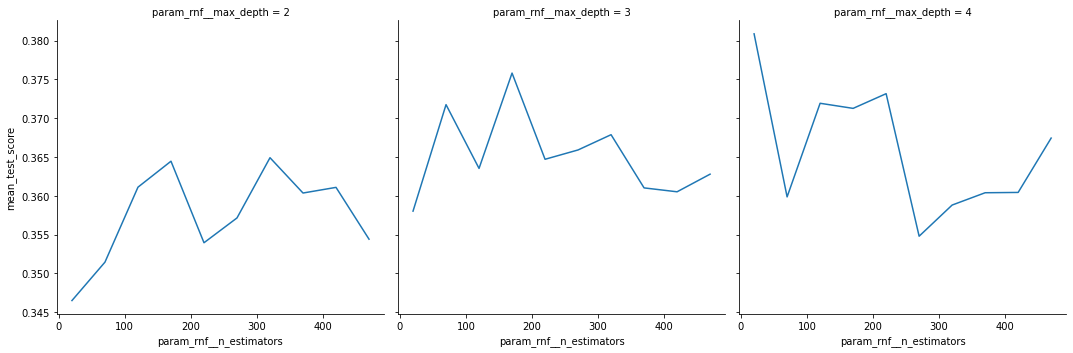

In [85]:
sns.relplot(data=result_rnf1, kind='line',
            x='param_rnf__n_estimators',
            y='mean_test_score', 
            col='param_rnf__max_depth')
plt.show()

### 1.4 roc_auc, precision_recall

In [86]:
target_var = 'POS_SR'
features = var_list

scaler = StandardScaler()
model_rnf = Pipeline(steps = [('scaler', scaler), ('rnf', RandomForestClassifier(n_estimators=20, max_depth=4, class_weight='balanced'))])
ML_trial1 = MLFramework(target_var=target_var, features=features, df=data)
ML_trial1.standardFlow(model = model_rnf, metric_CV='balanced_accuracy')

CV Score:  [0.3278691  0.34297035 0.3064454  0.31633453 0.37096121]
Insample Result:  0.573697270471464
Outsample Result:  0.4789833822091887
Remark: model is fitted with the whole trainning dataset 


In [87]:
y_true = ML_trial1.y_test # ground truth labels
y_probas = model_rnf.predict_proba(ML_trial1.X_test) # predicted probabilities generated by sklearn classifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


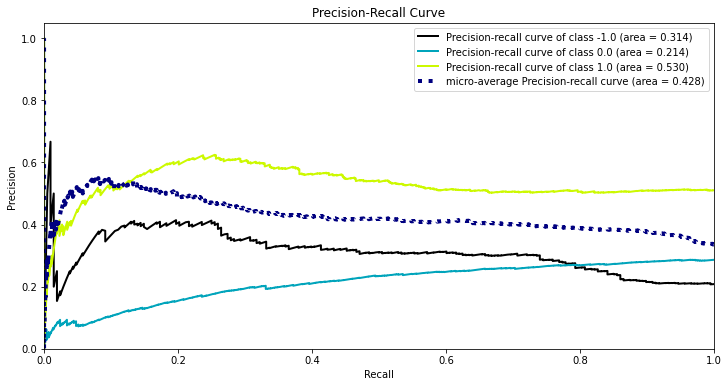

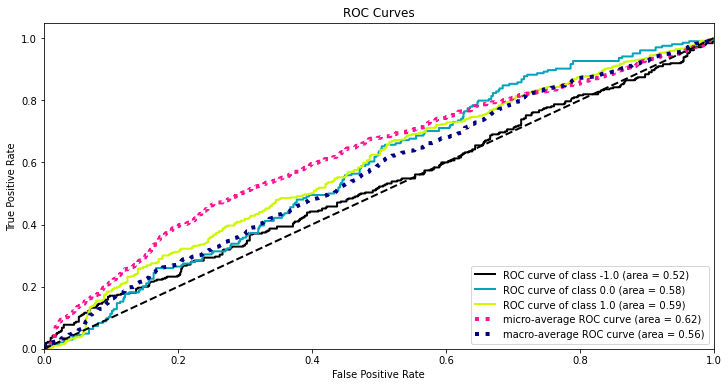

In [88]:
skplt.metrics.plot_precision_recall_curve(ML_trial.y_test, y_probas, figsize=(12,6))
skplt.metrics.plot_roc_curve(y_true, y_probas, figsize=(12,6))
plt.show()

..................................... words fail

### 1.5 confusion matrix

Insample: 
[[903 160 296]
 [353 427 233]
 [519 157 982]]
Outsample: 
[[  0  76 234]
 [  0  43 161]
 [  1  61 447]]


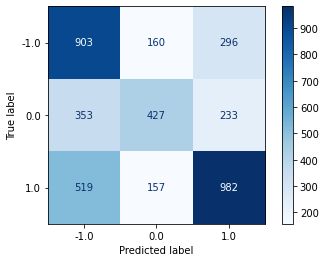

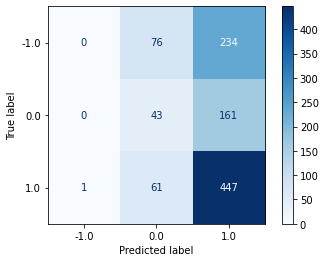

In [89]:
plot_ConfusionMatrix(ML_trial1)

### 1.6 feature importances

PX_LAST             0.006808
PX_VOLUME           0.006474
T1M                 0.000000
T3M                 0.014823
T6M                 0.016359
                      ...   
PX_EMA5_VPT         0.006480
PX_EMA5_FI          0.000803
PX_EMA5_KST         0.017814
PX_EMA5_KST_Diff    0.012552
PX_EMA5_KST_Sig     0.005498
Length: 149, dtype: float64

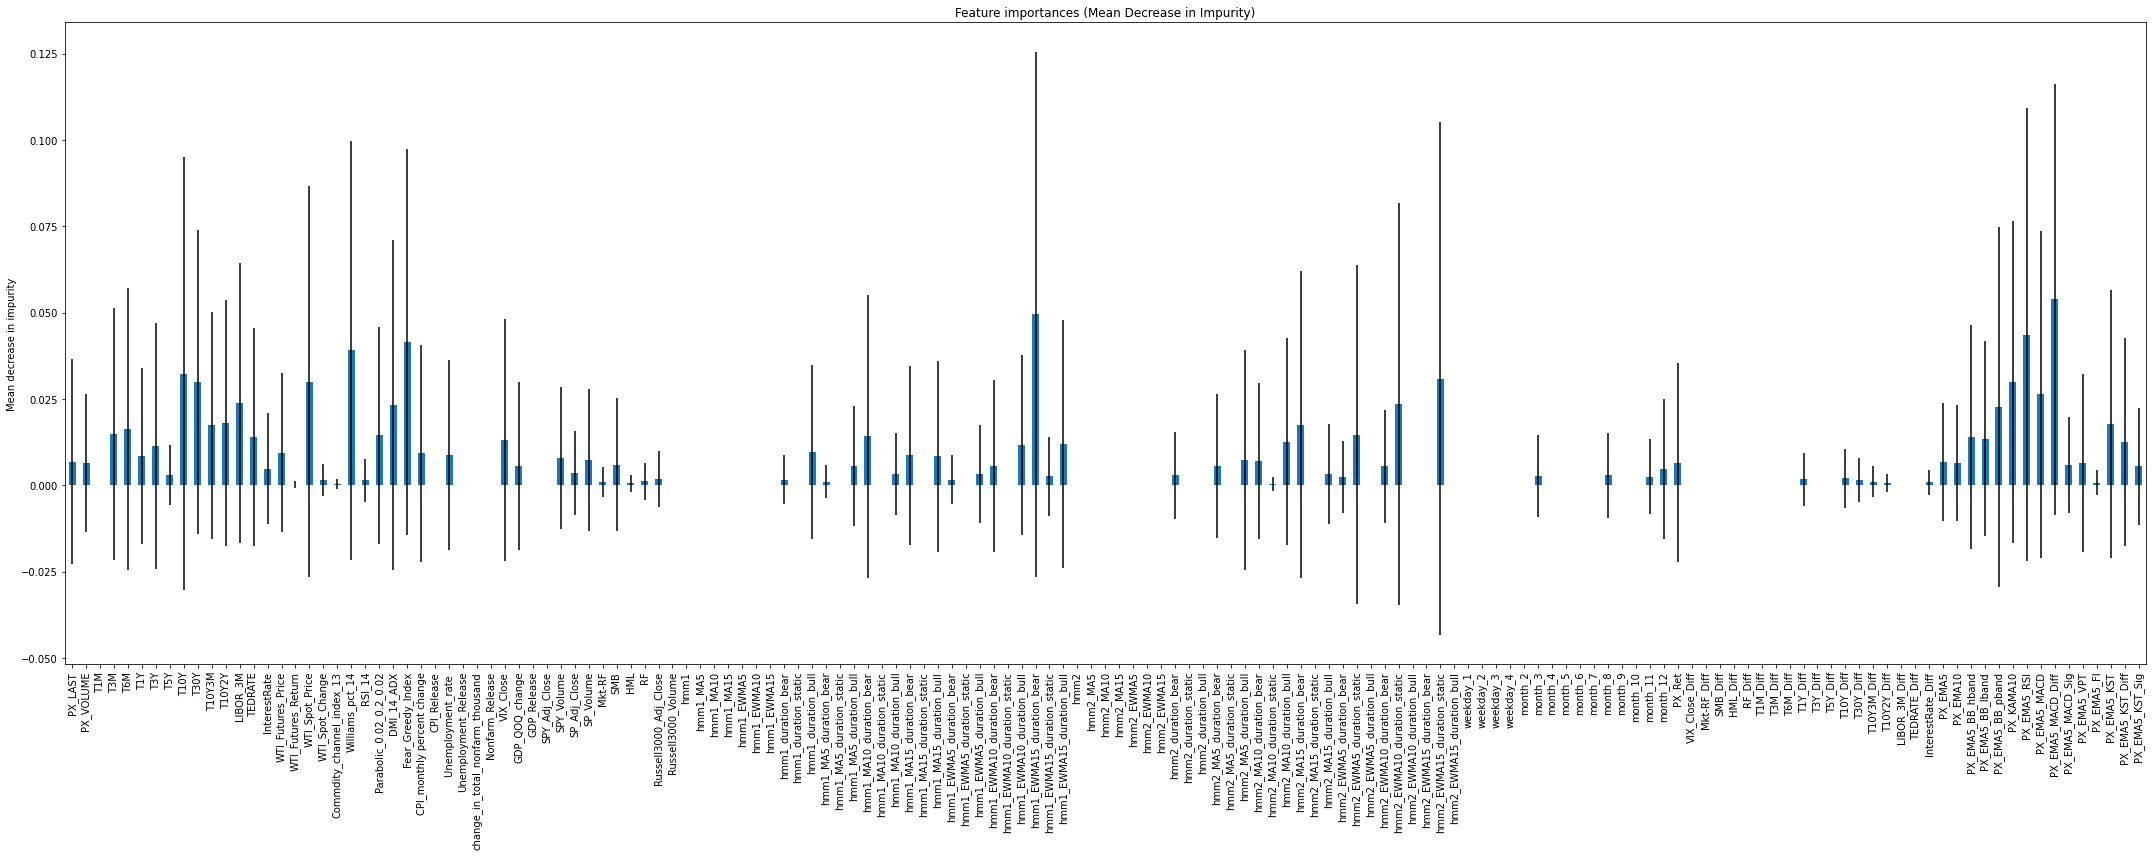

In [90]:
forest_importances = plot_FeatureImportance(ML_trial1)
forest_importances

In [91]:
forest_importances.sort_values(ascending=False)

PX_EMA5_MACD_Diff            0.053826
hmm1_EWMA15_duration_bear    0.049469
PX_EMA5_RSI                  0.043658
Fear_Greedy_Index            0.041496
Williams_pct_14              0.039077
                               ...   
hmm2_EWMA5_duration_bull     0.000000
hmm2_MA15_duration_static    0.000000
Russell3000_Volume           0.000000
hmm1                         0.000000
hmm2_MA10                    0.000000
Length: 149, dtype: float64

## Model2: hmm1_MA5_shifted, random forest

### 2.1 target var & model

In [93]:
target_var = 'hmm1_MA5_shifted'
features = var_list

scaler = StandardScaler()
model_rnf2 = Pipeline(steps = [('scaler', scaler), ('rnf', RandomForestClassifier(n_estimators=100, max_depth=3, class_weight='balanced'))])
ML_trial2 = MLFramework(target_var=target_var, features=features, df=data)
ML_trial2.standardFlow(model = model_rnf2, metric_CV = "balanced_accuracy")

CV Score:  [0.84533968 0.74115248 0.78751355 0.81293638 0.79067248]
Insample Result:  0.8213399503722084
Outsample Result:  0.8152492668621701
Remark: model is fitted with the whole trainning dataset 


### 2.2 grid search

In [94]:
params = dict(rnf__n_estimators = np.arange(20,501,50), rnf__max_depth = np.arange(2,5))
result_rnf2 = ML_trial2.gridSearch_TS(parameters=params, metric_CV='balanced_accuracy')

Best param from Grid Search: {'rnf__max_depth': 4, 'rnf__n_estimators': 70}
CV score for the best param: 0.7965137331947971


In [48]:
result_rnf2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rnf__max_depth,param_rnf__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.082333,0.017540,0.010049,0.002893,2,20,"{'rnf__max_depth': 2, 'rnf__n_estimators': 20}",0.814714,0.743555,0.782245,0.757983,0.743847,0.768469,0.027075,30
1,0.229259,0.057899,0.015176,0.001460,2,70,"{'rnf__max_depth': 2, 'rnf__n_estimators': 70}",0.838144,0.735071,0.782545,0.766029,0.776151,0.779588,0.033511,24
2,0.391158,0.108513,0.020935,0.000413,2,120,"{'rnf__max_depth': 2, 'rnf__n_estimators': 120}",0.834262,0.746967,0.761478,0.788676,0.772848,0.780846,0.030005,21
3,0.752117,0.488460,0.045381,0.035925,2,170,"{'rnf__max_depth': 2, 'rnf__n_estimators': 170}",0.825205,0.747081,0.769857,0.784476,0.748907,0.775105,0.028625,27
4,1.927094,0.468527,0.091002,0.058579,2,220,"{'rnf__max_depth': 2, 'rnf__n_estimators': 220}",0.824436,0.737435,0.757947,0.779426,0.773848,0.774618,0.028866,29
5,0.869509,0.240739,0.040835,0.001226,2,270,"{'rnf__max_depth': 2, 'rnf__n_estimators': 270}",0.833189,0.733793,0.757947,0.784299,0.764125,0.774671,0.033403,28
6,1.012350,0.273593,0.049629,0.004185,2,320,"{'rnf__max_depth': 2, 'rnf__n_estimators': 320}",0.825797,0.732859,0.775904,0.799610,0.773848,0.781604,0.030809,20
7,1.193453,0.336851,0.055452,0.004168,2,370,"{'rnf__max_depth': 2, 'rnf__n_estimators': 370}",0.831828,0.731239,0.764052,0.782616,0.790067,0.779960,0.032943,22
8,1.770542,1.038560,0.098615,0.046104,2,420,"{'rnf__max_depth': 2, 'rnf__n_estimators': 420}",0.821608,0.737511,0.758604,0.773011,0.791899,0.776527,0.028721,25
9,1.669416,0.216619,0.080822,0.023561,2,470,"{'rnf__max_depth': 2, 'rnf__n_estimators': 470}",0.830271,0.731544,0.761778,0.776342,0.781608,0.776309,0.032109,26


### 2.3 relplot

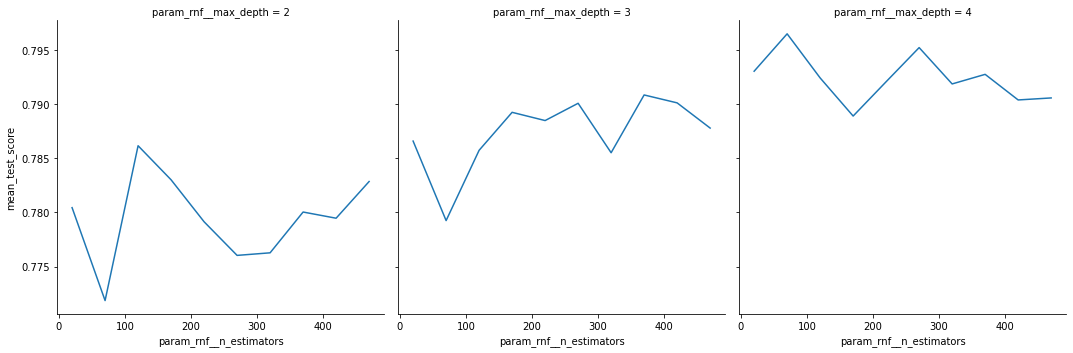

In [95]:
sns.relplot(data=result_rnf2, kind='line',
            x='param_rnf__n_estimators',
            y='mean_test_score', 
            col='param_rnf__max_depth')
plt.show()

### 2.4 roc_auc, precision_recall

In [96]:
target_var = 'hmm1_MA5_shifted'
features = var_list

scaler = StandardScaler()
model_rnf2 = Pipeline(steps = [('scaler', scaler), ('rnf', RandomForestClassifier(n_estimators=70, max_depth=4, class_weight='balanced'))])
ML_trial2 = MLFramework(target_var=target_var, features=features, df=data)
ML_trial2.standardFlow(model = model_rnf2, metric_CV = "balanced_accuracy")

CV Score:  [0.85079555 0.73781604 0.79116605 0.80574163 0.80196408]
Insample Result:  0.8272952853598015
Outsample Result:  0.804496578690127
Remark: model is fitted with the whole trainning dataset 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


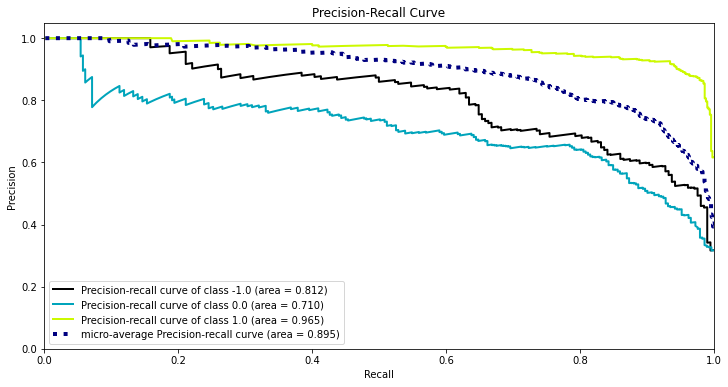

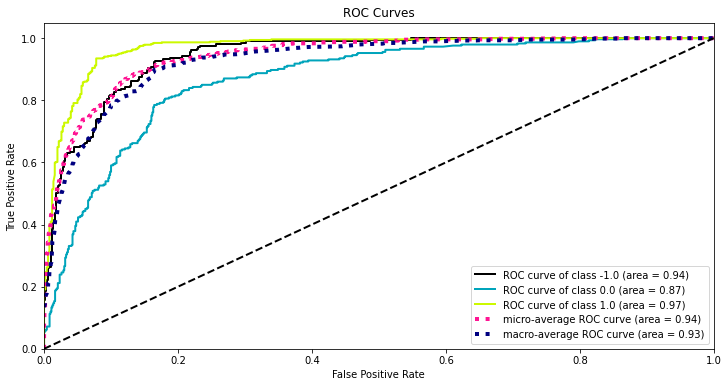

In [97]:
y_true2 = ML_trial2.y_test# ground truth labels
y_probas2 = model_rnf2.predict_proba(ML_trial2.X_test)# predicted probabilities generated by sklearn classifier

skplt.metrics.plot_precision_recall_curve(ML_trial2.y_test, y_probas2, figsize=(12,6))
skplt.metrics.plot_roc_curve(y_true2, y_probas2, figsize=(12,6))
plt.show()

### 2.5 confusion matrix

Insample: 
[[ 619  129    3]
 [ 227  927  138]
 [   6  193 1788]]
Outsample: 
[[138  68   2]
 [ 52 204  37]
 [  0  41 481]]


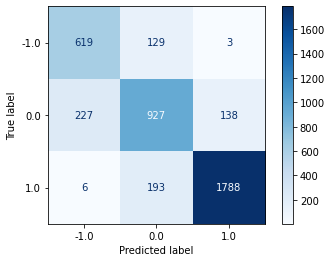

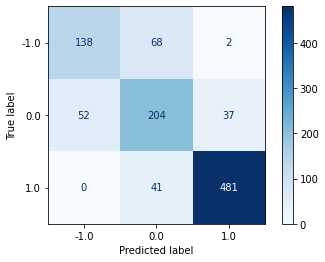

In [98]:
plot_ConfusionMatrix(ML_trial2)

### 2.6 feature importances

hmm1_MA5                    0.113058
hmm1_MA5_duration_bull      0.095915
hmm1_EWMA5                  0.082911
hmm1_EWMA5_duration_bear    0.061679
hmm1_MA5_duration_static    0.061277
                              ...   
month_7                     0.000000
month_8                     0.000000
month_9                     0.000000
CPI_Release                 0.000000
hmm2_EWMA5_duration_bull    0.000000
Length: 149, dtype: float64

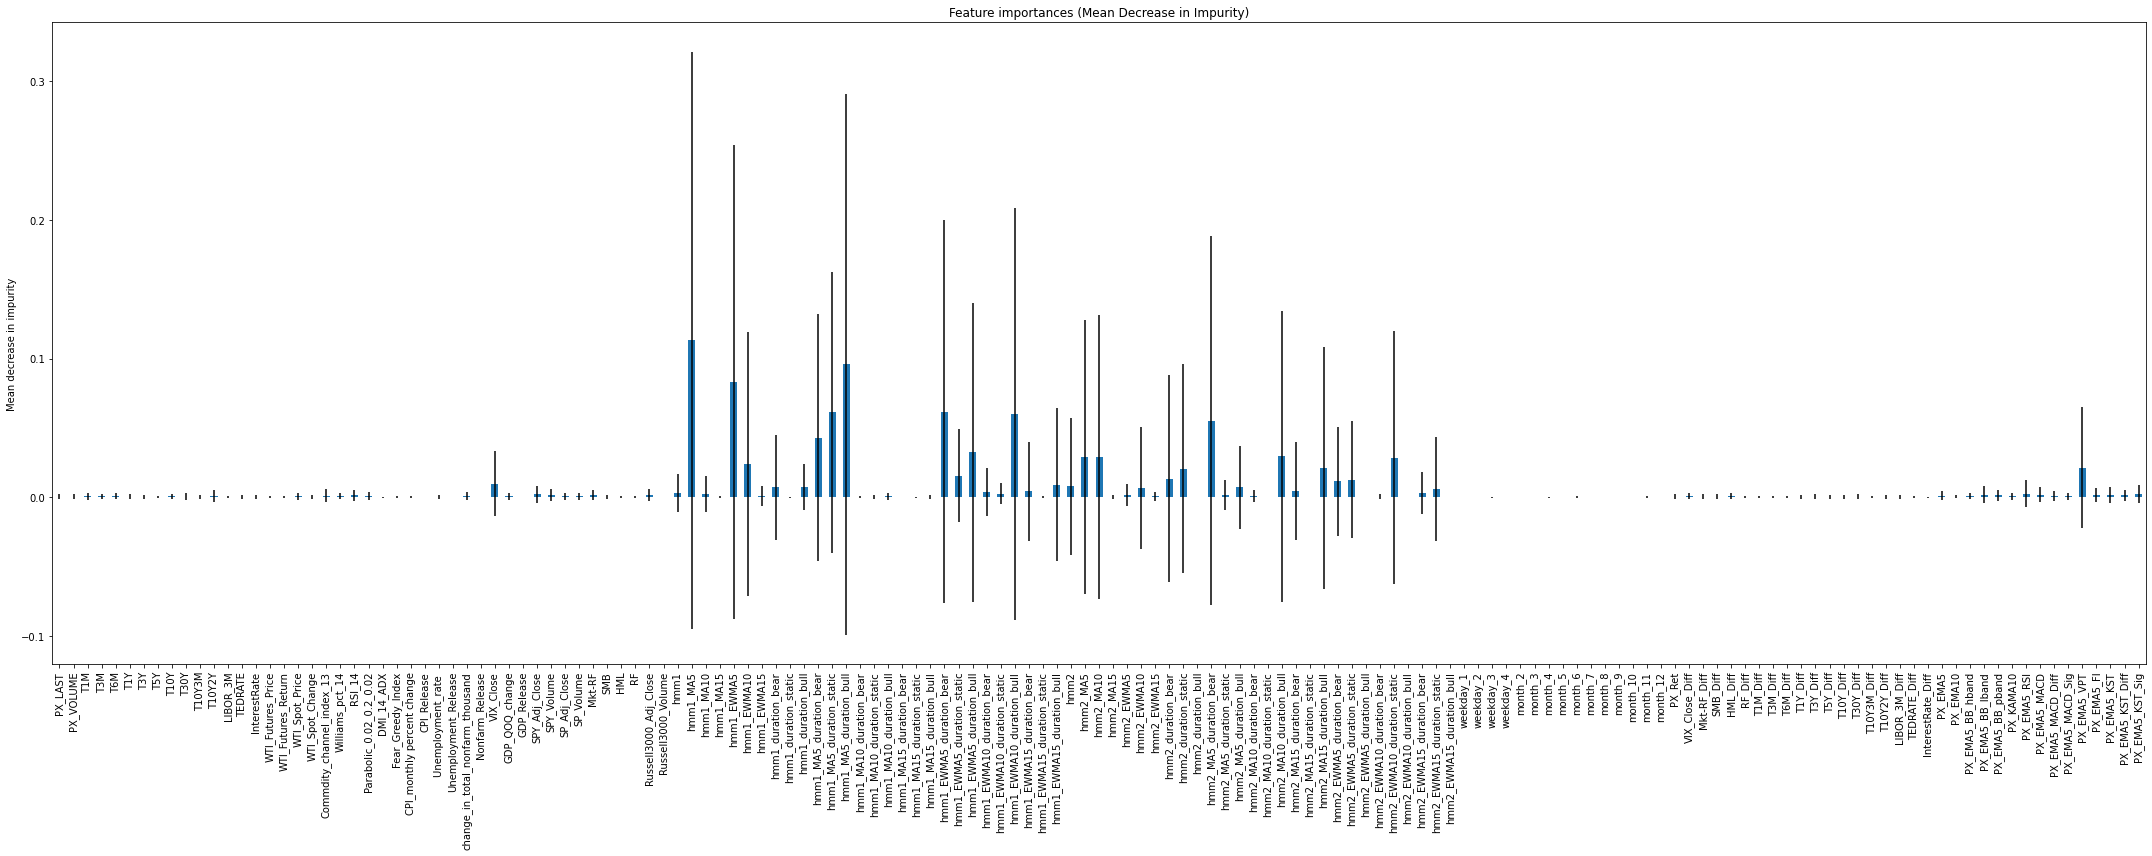

In [111]:
forest_importances2 = plot_FeatureImportance(ML_trial2)
forest_importances2.sort_values(ascending=False)

## Model3: hmm1_MA5_shifted, random forest, excluding hmm features

What if we do not use hmm.shift() as features?

### 3.1 target var & model

In [114]:
features2 = [ft for ft in var_list if 'hmm' not in ft]
len(features2)

93

In [115]:
target_var3 = 'hmm1_MA5_shifted'
# features = var_list
features3 = [ft for ft in var_list if 'hmm' not in ft]

scaler = StandardScaler()
model_rnf3 = Pipeline(steps = [('scaler', scaler), ('rnf', RandomForestClassifier(n_estimators=120, max_depth=3, class_weight='balanced'))])
ML_trial3 = MLFramework(target_var=target_var, features=features3, df=data)
ML_trial3.standardFlow(model = model_rnf3, metric_CV = "balanced_accuracy")

CV Score:  [0.69673161 0.594195   0.60115665 0.60446571 0.65059326]
Insample Result:  0.7337468982630273
Outsample Result:  0.7302052785923754
Remark: model is fitted with the whole trainning dataset 


### 3.2 grid search

In [116]:
params = dict(rnf__n_estimators = np.arange(20,501,50), rnf__max_depth = np.arange(2,5))
result_rnf3 = ML_trial3.gridSearch_TS(parameters=params, metric_CV='balanced_accuracy')
result_rnf3

Best param from Grid Search: {'rnf__max_depth': 2, 'rnf__n_estimators': 70}
CV score for the best param: 0.6504423648490436


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rnf__max_depth,param_rnf__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.082203,0.024197,0.008250,0.000709,2,20,"{'rnf__max_depth': 2, 'rnf__n_estimators': 20}",0.568994,0.529955,0.582030,0.608843,0.644817,0.586928,0.038530,29
1,0.322583,0.144485,0.026007,0.012082,2,70,"{'rnf__max_depth': 2, 'rnf__n_estimators': 70}",0.772208,0.628589,0.624098,0.578327,0.648990,0.650442,0.065117,1
2,0.467514,0.057318,0.024521,0.008036,2,120,"{'rnf__max_depth': 2, 'rnf__n_estimators': 120}",0.568225,0.582106,0.588283,0.622329,0.635529,0.599294,0.025399,21
3,0.554790,0.152348,0.025713,0.000353,2,170,"{'rnf__max_depth': 2, 'rnf__n_estimators': 170}",0.742211,0.590839,0.596684,0.636381,0.641722,0.641568,0.054303,2
4,0.839481,0.434322,0.034346,0.005108,2,220,"{'rnf__max_depth': 2, 'rnf__n_estimators': 220}",0.725080,0.604736,0.598589,0.595605,0.649578,0.634718,0.049235,3
5,0.873463,0.252686,0.040391,0.002479,2,270,"{'rnf__max_depth': 2, 'rnf__n_estimators': 270}",0.581664,0.616518,0.566005,0.596279,0.653373,0.602768,0.030295,19
6,1.012372,0.282657,0.044067,0.000479,2,320,"{'rnf__max_depth': 2, 'rnf__n_estimators': 320}",0.688372,0.587313,0.561494,0.584476,0.649615,0.614254,0.047202,9
7,1.177515,0.328546,0.051876,0.002120,2,370,"{'rnf__max_depth': 2, 'rnf__n_estimators': 370}",0.658967,0.619916,0.572052,0.602410,0.649879,0.620645,0.031678,7
8,1.348515,0.382796,0.057384,0.001198,2,420,"{'rnf__max_depth': 2, 'rnf__n_estimators': 420}",0.656926,0.623861,0.607198,0.626068,0.650578,0.632926,0.018323,4
9,1.629630,0.418589,0.064828,0.003082,2,470,"{'rnf__max_depth': 2, 'rnf__n_estimators': 470}",0.579231,0.581574,0.603309,0.636417,0.649578,0.610022,0.028509,12


### 3.3 relplot

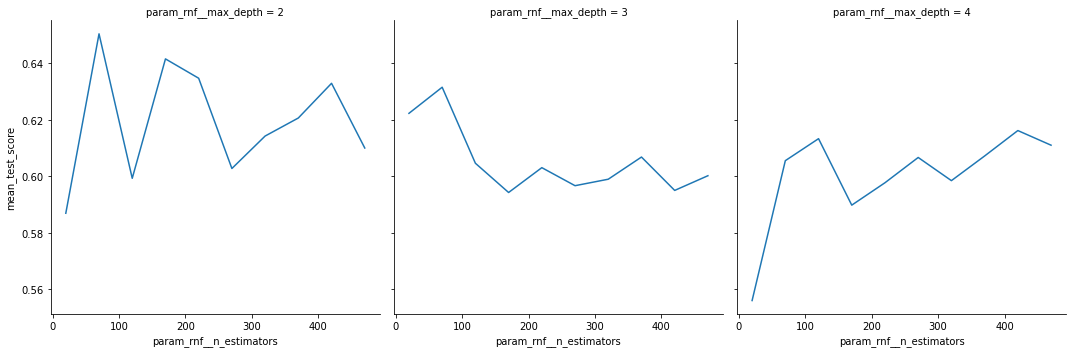

In [117]:
sns.relplot(data=result_rnf3, kind='line',
            x='param_rnf__n_estimators',
            y='mean_test_score', 
            col='param_rnf__max_depth')
plt.show()

### 3.4 roc_auc, precision_call

In [118]:
target_var3 = 'hmm1_MA5_shifted'
features3 = [ft for ft in var_list if 'hmm' not in ft]

scaler = StandardScaler()
model_rnf3 = Pipeline(steps = [('scaler', scaler), ('rnf', RandomForestClassifier(n_estimators=70, max_depth=2, class_weight='balanced'))])
ML_trial3 = MLFramework(target_var=target_var, features=features3, df=data)
ML_trial3.standardFlow(model = model_rnf3, metric_CV = "balanced_accuracy")

CV Score:  [0.7304339  0.61331572 0.58644184 0.59760766 0.64628978]
Insample Result:  0.7069478908188586
Outsample Result:  0.7106549364613881
Remark: model is fitted with the whole trainning dataset 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


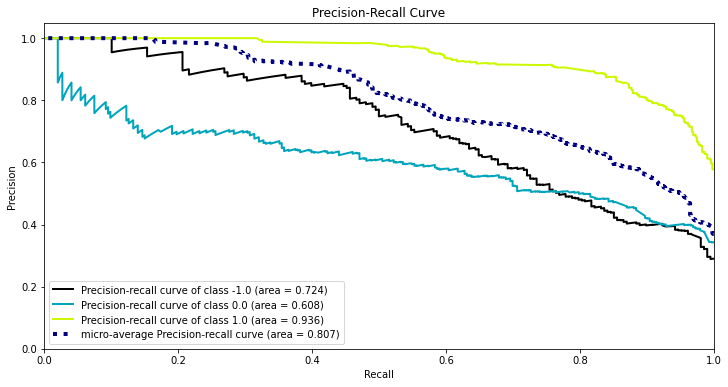

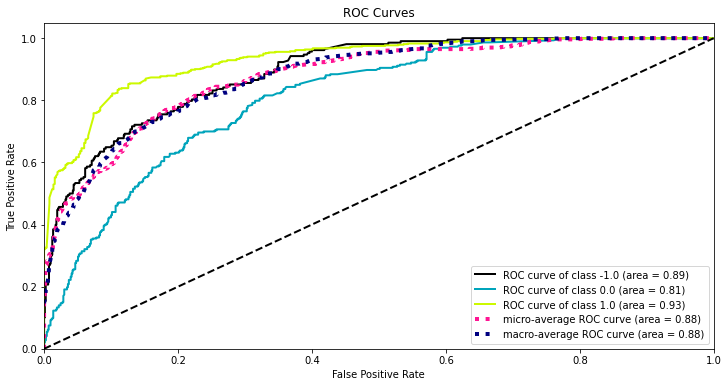

In [119]:
y_true3 = ML_trial3.y_test# ground truth labels
y_probas3 = model_rnf3.predict_proba(ML_trial3.X_test)# predicted probabilities generated by sklearn classifier

skplt.metrics.plot_precision_recall_curve(ML_trial3.y_test, y_probas3, figsize=(12,6))
skplt.metrics.plot_roc_curve(y_true3, y_probas3, figsize=(12,6))
plt.show()

### 3.5 confusion matrix

Insample: 
[[ 617  109   25]
 [ 409  555  328]
 [  38  272 1677]]
Outsample: 
[[126  33  49]
 [ 47 101 145]
 [  3  19 500]]


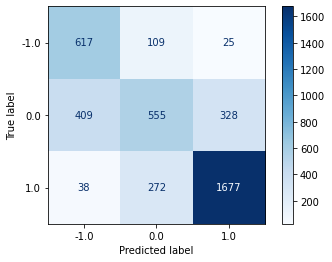

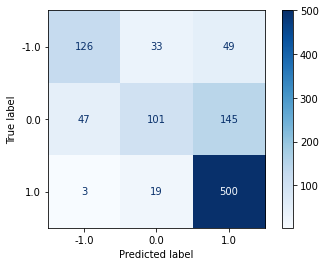

In [120]:
plot_ConfusionMatrix(ML_trial3)

### 3.6 feature importances

VIX_Close           0.145329
PX_EMA5_RSI         0.110068
PX_EMA5_VPT         0.101374
PX_EMA5_BB_pband    0.091882
PX_EMA5_MACD        0.069948
                      ...   
month_10            0.000000
month_11            0.000000
month_12            0.000000
PX_Ret              0.000000
weekday_3           0.000000
Length: 93, dtype: float64

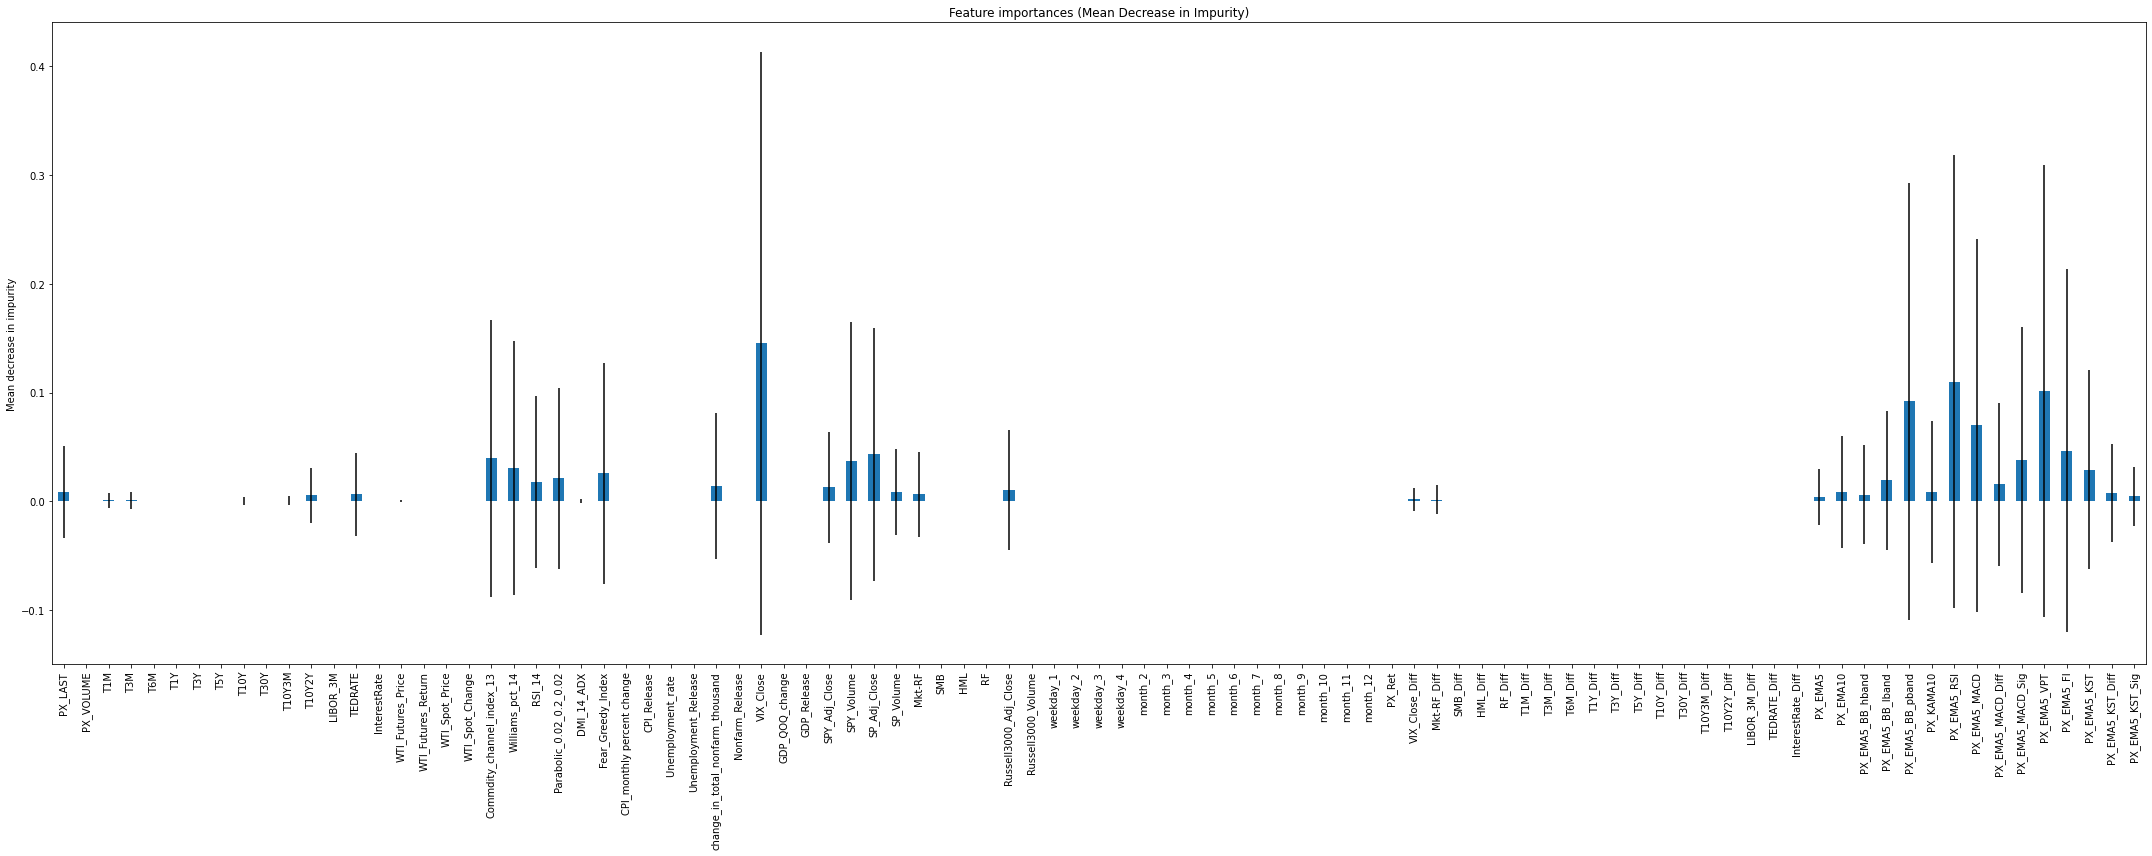

In [122]:
forest_importances3 = plot_FeatureImportance(ML_trial3)
forest_importances3.sort_values(ascending=False)

In [154]:
ML_trial3.X_test.columns

Index(['PX_LAST', 'PX_VOLUME', 'T1M', 'T3M', 'T6M', 'T1Y', 'T3Y', 'T5Y',
       'T10Y', 'T30Y', 'T10Y3M', 'T10Y2Y', 'LIBOR_3M', 'TEDRATE',
       'InterestRate', 'WTI_Futures_Price', 'WTI_Futures_Return',
       'WTI_Spot_Price', 'WTI_Spot_Change', 'Commdity_channel_index_13',
       'Williams_pct_14', 'RSI_14', 'Parabolic_0.02_0.2_0.02', 'DMI_14_ADX',
       'Fear_Greedy_Index', 'CPI_monthly percent change', 'CPI_Release',
       'Unemployment_rate ', 'Unemployment_Release',
       'change_in_total_nonfarm_thousand', 'Nonfarm_Release', 'VIX_Close',
       'GDP_QOQ_change', 'GDP_Release', 'SPY_Adj_Close', 'SPY_Volume',
       'SP_Adj_Close', 'SP_Volume', 'Mkt-RF', 'SMB', 'HML', 'RF',
       'Russell3000_Adj_Close', 'Russell3000_Volume', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'PX_Ret', 'VIX_Close_Diff', 'Mkt-RF_Diff', 'SMB_Diff',
 

In [156]:
ML_trial3.X_test['PX_Ret'].cumsum()

Date
2018-01-02    0.008283
2018-01-03    0.014112
2018-01-04    0.017913
2018-01-05    0.024321
2018-01-08    0.026171
                ...   
2022-01-18    0.588210
2022-01-19    0.578048
2022-01-20    0.566355
2022-01-21    0.546764
2022-01-24    0.552006
Name: PX_Ret, Length: 1023, dtype: float64

## Model4: hmm1_MA5_shifted, adaboost

### 4.1 target var & model

In [130]:
from sklearn.tree import DecisionTreeClassifier
target_var4 = 'hmm1_MA5_shifted'
features4 = var_list

scaler = StandardScaler()
model_rnf4 = Pipeline(steps = [('scaler', scaler), ('ab', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), 
n_estimators=50, learning_rate=1.0))])
ML_trial4 = MLFramework(target_var=target_var4, features=features4, df=data)
ML_trial4.standardFlow(model = model_rnf4, metric_CV = "balanced_accuracy")

CV Score:  [0.69630758 0.56605804 0.44922468 0.51034911 0.70680425]
Insample Result:  0.7977667493796526
Outsample Result:  0.7478005865102639
Remark: model is fitted with the whole trainning dataset 


### 4.2 grid search

In [157]:
params = dict(ab__n_estimators = np.arange(20,501,50), ab__learning_rate = [0.5, 1.0])
result_rnf4 = ML_trial4.gridSearch_TS(parameters=params, metric_CV='balanced_accuracy')

Best param from Grid Search: {'ab__learning_rate': 1.0, 'ab__n_estimators': 20}
CV score for the best param: 0.6453348485750573


### 4.3 relplot

In [ ]:
sns.relplot(data=result_rnf4, kind='line',
            x='param_ab__n_estimators',
            y='mean_test_score', 
            hue='param_ab__learning_rate')
plt.show()

### 4.4 roc_auc, precision_call

In [ ]:
target_var4 = 'hmm1_MA5_shifted'
features4 = var_list

scaler = StandardScaler()
model_rnf4 = Pipeline(steps = [('scaler', scaler), ('ab', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), 
n_estimators=50, learning_rate=1.0))])
ML_trial4 = MLFramework(target_var=target_var4, features=features4, df=data)
ML_trial4.standardFlow(model = model_rnf4, metric_CV = "balanced_accuracy")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


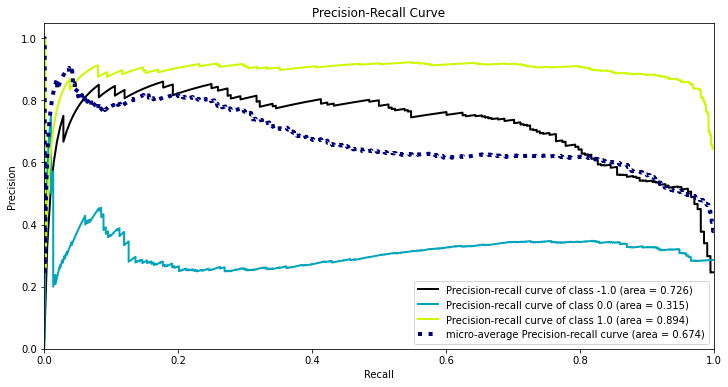

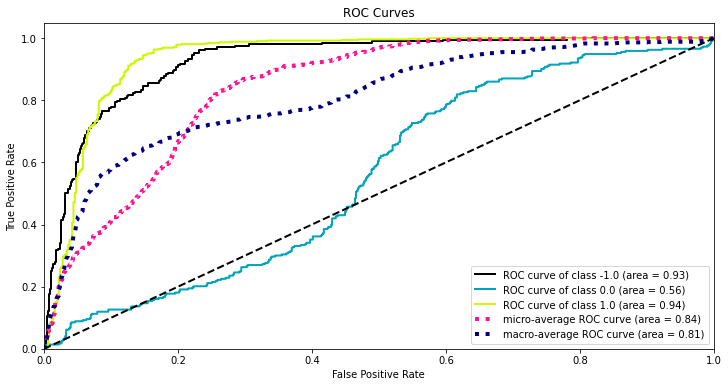

In [131]:
y_true4 = ML_trial4.y_test# ground truth labels
y_probas4 = model_rnf4.predict_proba(ML_trial4.X_test)# predicted probabilities generated by sklearn classifier

skplt.metrics.plot_precision_recall_curve(ML_trial4.y_test, y_probas4, figsize=(12,6))
skplt.metrics.plot_roc_curve(y_true4, y_probas4, figsize=(12,6))
plt.show()

### 4.5 confusion matrix

Insample: 
[[ 509  242    0]
 [ 211  873  208]
 [   0  154 1833]]
Outsample: 
[[ 80 122   6]
 [ 30 218  45]
 [  0  55 467]]


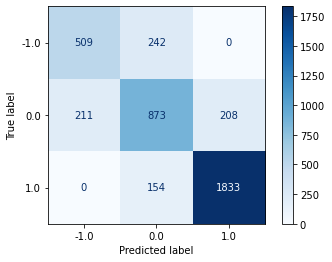

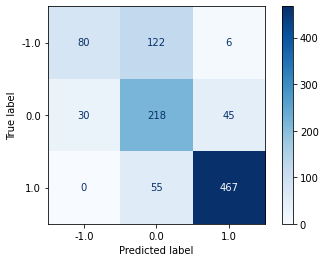

In [132]:
plot_ConfusionMatrix(ML_trial4)

### 4.6 feature importances

PX_EMA5_VPT                    0.062801
hmm1_MA5_duration_bull         0.061477
hmm1_EWMA5_duration_bull       0.046050
SMB_Diff                       0.040995
hmm1_MA5_duration_static       0.039520
                                 ...   
DMI_14_ADX                     0.000000
hmm2_MA5                       0.000000
hmm2                           0.000000
hmm1_EWMA15_duration_static    0.000000
hmm2_MA10                      0.000000
Length: 149, dtype: float64

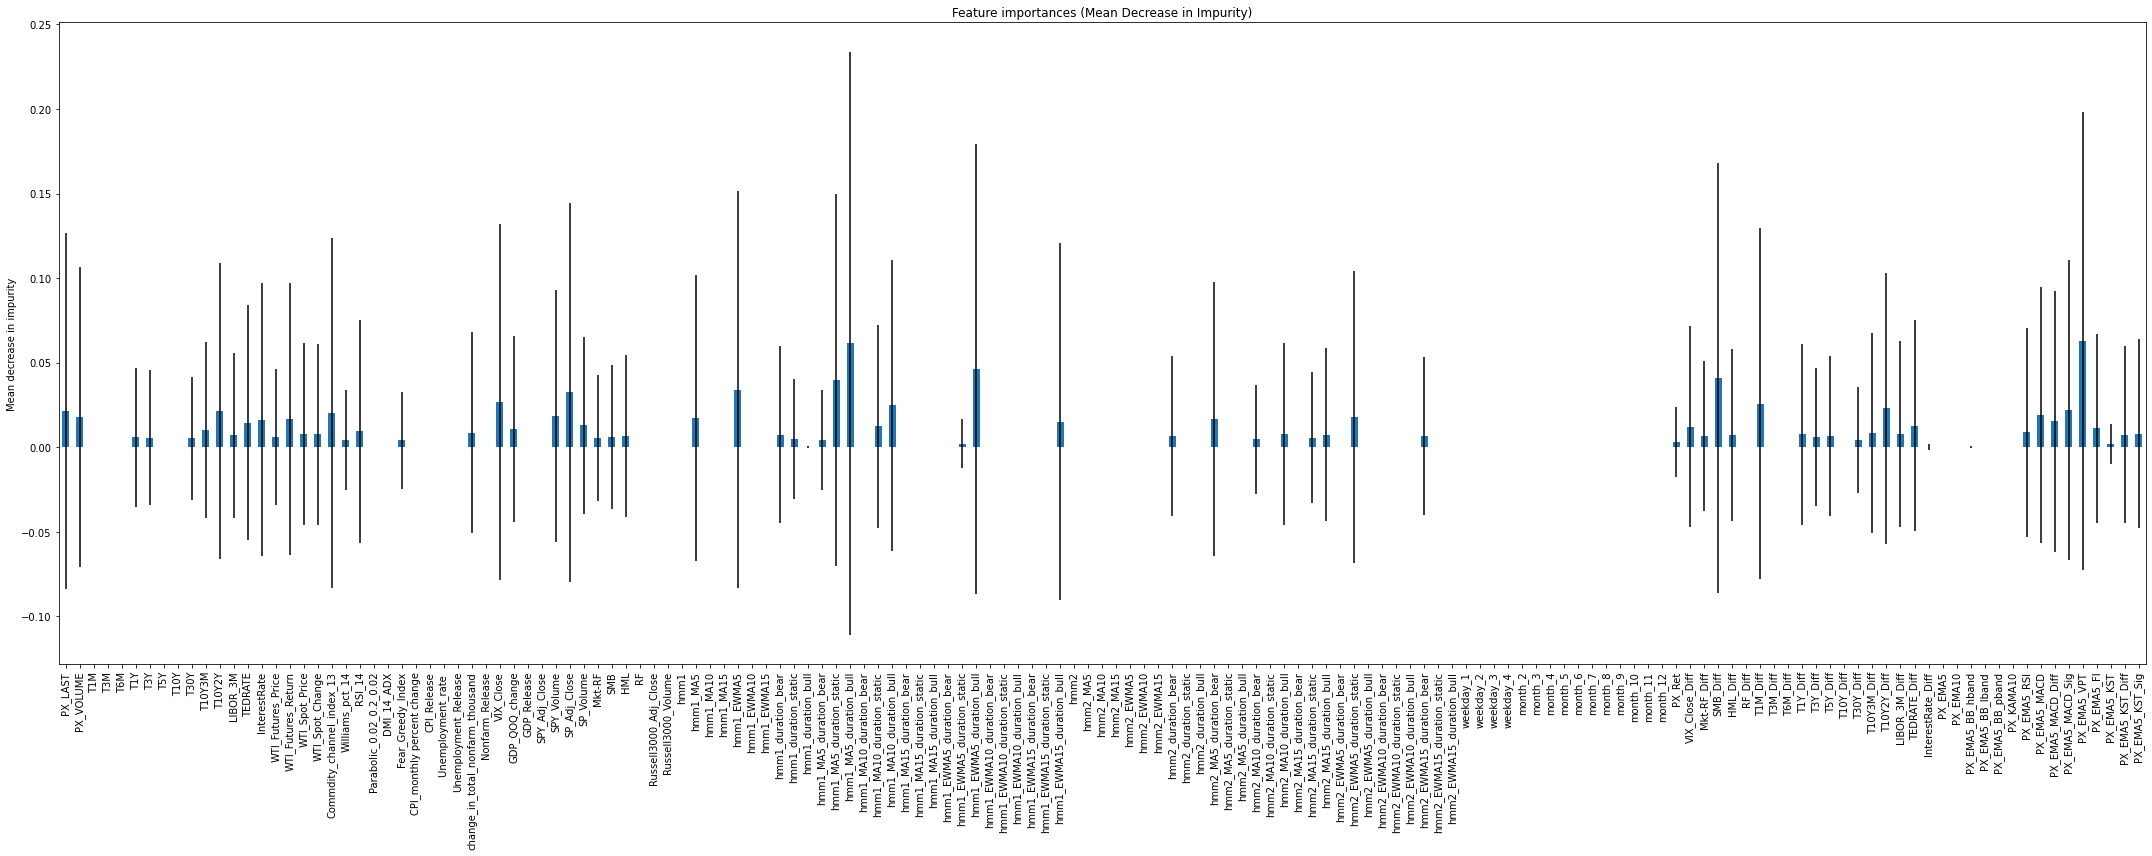

In [133]:
forest_importances4 = plot_FeatureImportance(ML_trial4)
forest_importances4.sort_values(ascending=False)

## Model5: hmm1_MA5_shifted, svm

### 5.1 target var & model

In [146]:
target_var5 = 'hmm1_MA5_shifted'
features5 = var_list

scaler = StandardScaler()
model_svc5 = Pipeline(steps=[('scaler', scaler), ('svc', SVC(kernel='rbf', C=1.0, class_weight='balanced', probability=True))])
ML_trial5 = MLFramework(target_var=target_var5, features=features5, df=data)
ML_trial5.standardFlow(model = model_svc5, metric_CV='balanced_accuracy')

CV Score:  [0.37330817 0.5974975  0.77697716 0.68743576 0.77280501]
Insample Result:  0.8838709677419355
Outsample Result:  0.6021505376344086
Remark: model is fitted with the whole trainning dataset 


### 5.2 grid search

In [147]:
params = dict(svc__C = np.arange(0.2,1.0,0.2), svc__kernel = ['poly','rbf','sigmoid'], svc__gamma = ['scale', 'auto'])
result_svc5 = ML_trial5.gridSearch_TS(parameters=params, metric_CV='balanced_accuracy')

Best param from Grid Search: {'svc__C': 0.8, 'svc__gamma': 'auto', 'svc__kernel': 'poly'}
CV score for the best param: 0.7074546240580672


### 5.3 relplot

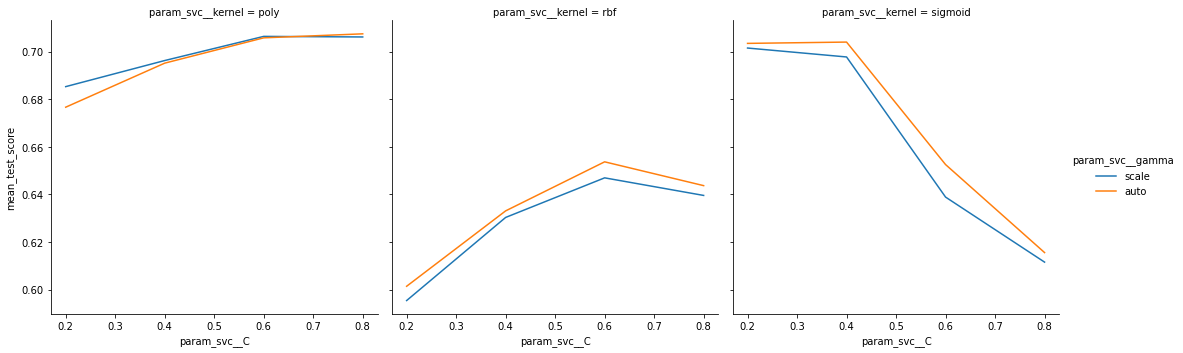

In [148]:
sns.relplot(data=result_svc5, kind='line',
            x='param_svc__C',
            y='mean_test_score', 
            col='param_svc__kernel',
            hue='param_svc__gamma')
plt.show()

### 5.4 roc_auc, precision_call

In [149]:
target_var5 = 'hmm1_MA5_shifted'
features5 = var_list

scaler = StandardScaler()
model_svc5 = Pipeline(steps=[('scaler', scaler), ('svc', SVC(kernel='poly', C=0.8, gamma='auto', class_weight='balanced', probability=True))])
ML_trial5 = MLFramework(target_var=target_var5, features=features5, df=data)
ML_trial5.standardFlow(model = model_svc5, metric_CV='balanced_accuracy')

CV Score:  [0.75413613 0.61610092 0.72022699 0.71017189 0.73663717]
Insample Result:  0.8870967741935484
Outsample Result:  0.7253176930596286
Remark: model is fitted with the whole trainning dataset 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


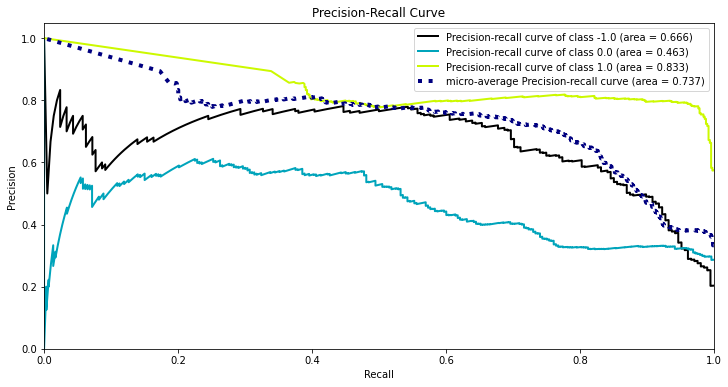

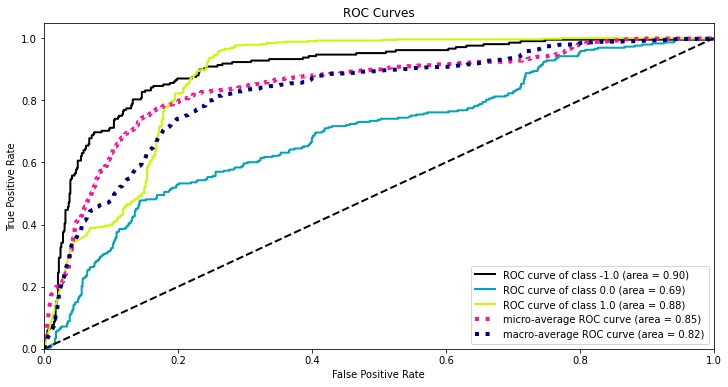

In [150]:
y_true5 = ML_trial5.y_test# ground truth labels
y_probas5 = model_svc5.predict_proba(ML_trial5.X_test)# predicted probabilities generated by sklearn classifier

skplt.metrics.plot_precision_recall_curve(ML_trial5.y_test, y_probas5, figsize=(12,6))
skplt.metrics.plot_roc_curve(y_true5, y_probas5, figsize=(12,6))
plt.show()

### 5.5 confusion matrix

Insample: 
[[ 659   90    2]
 [  62 1087  143]
 [   1  157 1829]]
Outsample: 
[[133  54  21]
 [ 58  98 137]
 [  0  11 511]]


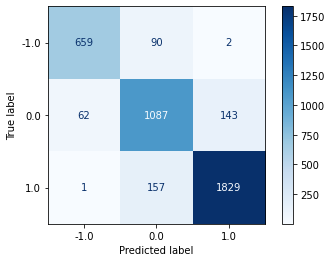

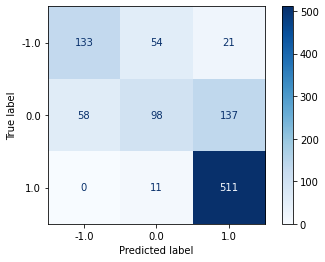

In [151]:
plot_ConfusionMatrix(ML_trial5)

### 5.6 feature importances

In [153]:
# forest_importances5 = plot_FeatureImportance(ML_trial5)
# forest_importances5.sort_values(ascending=False)

features augmentation  
hyperparameter tuning, realtionship between parameter and results  
auc_roc VS accuracy, recall precision tradeoff, probability threshold, penalty  
hmm.shift() as feature?

# Feature Importances

There is attribute coef_ for SVM classifier but it only works for SVM with linear kernel. For other kernels it is not possible because data are transformed by kernel method to another space, which is not related to input space.

In [57]:
def plot_FeatureImportance(model):
  importances = model_rnf.steps[1][1].feature_importances_
  forest_importances = pd.Series(importances, index=features)
  std = np.std([tree.feature_importances_ for tree in model_rnf.steps[1][1].estimators_], axis=0)

  fig = plt.figure(figsize=(30,12))
  ax = fig.add_subplot(111)
  forest_importances.plot.bar(yerr=std, ax=ax)
  ax.set_title("Feature importances (Mean Decrease in Impurity)")
  ax.set_ylabel("Mean decrease in impurity")
  fig.tight_layout()

  return forest_importances

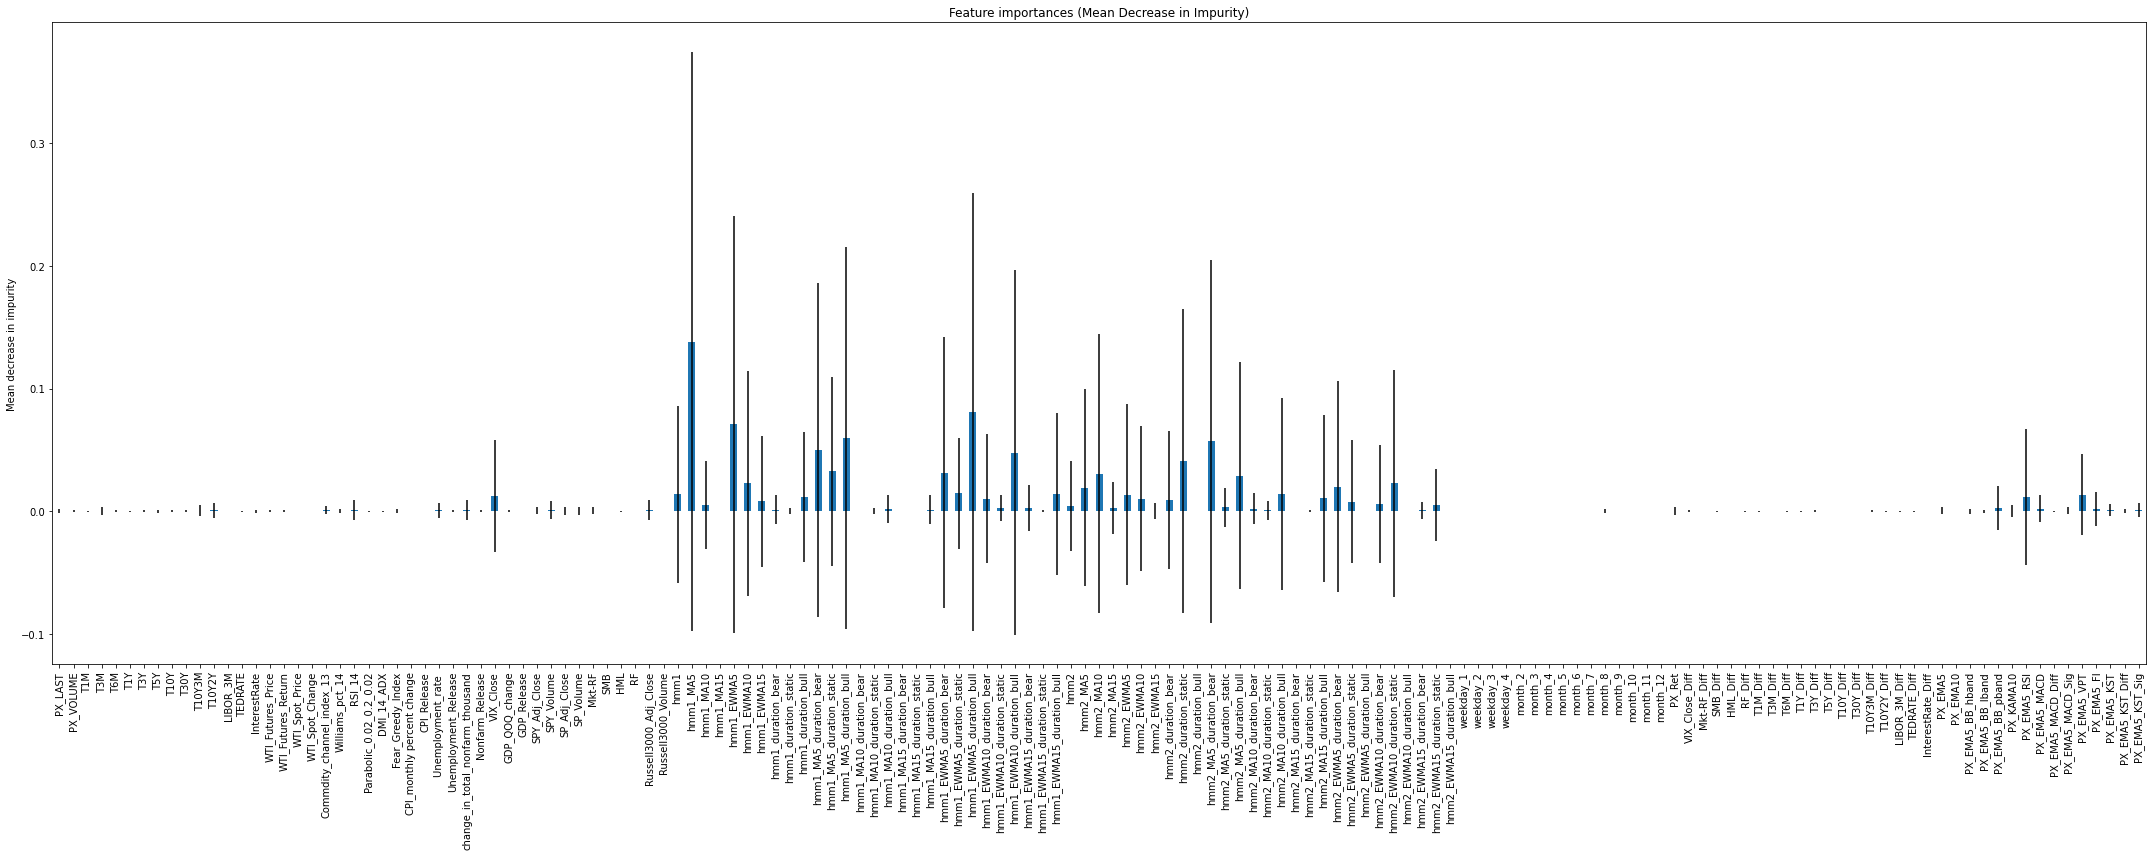

In [77]:
forest_importances = plot_FeatureImportance(model_rnf)

In [31]:
forest_importances1 = forest_importances.sort_values(ascending=False)

In [40]:
forest_importances1

hmm1_MA5                    0.137804
hmm1_EWMA5                  0.096989
hmm1_EWMA5_duration_bull    0.094596
hmm1_MA5_duration_bull      0.070018
hmm1_MA5_duration_bear      0.060815
                              ...   
Russell3000_Volume          0.000000
hmm2_duration_bull          0.000000
T3M_Diff                    0.000000
T6M_Diff                    0.000000
hmm2_EWMA5_duration_bull    0.000000
Length: 149, dtype: float64

## feature importances without hmm

In [50]:
importances = model_rnf.steps[1][1].feature_importances_
forest_importances = pd.Series(importances, index=features)
std = np.std([tree.feature_importances_ for tree in model_rnf.steps[1][1].estimators_], axis=0)

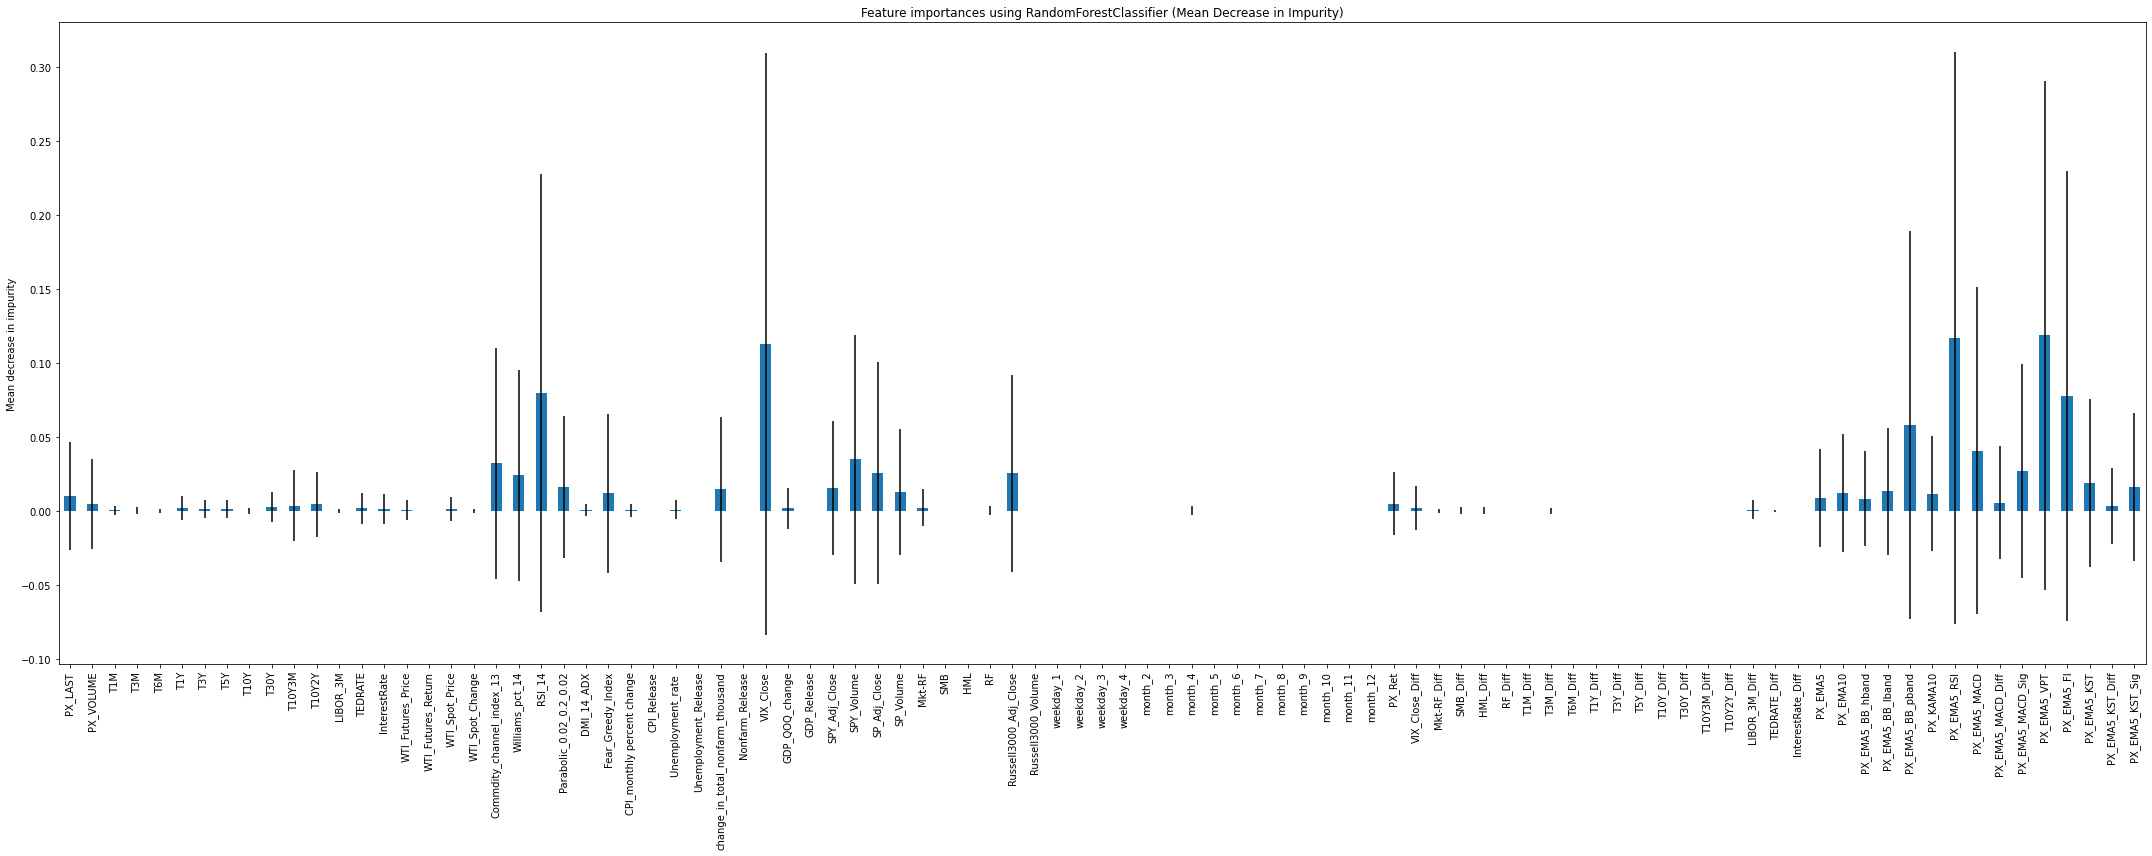

In [52]:
fig = plt.figure(figsize=(30,12))
ax = fig.add_subplot(111)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using RandomForestClassifier (Mean Decrease in Impurity)")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [51]:
forest_importances1 = forest_importances.sort_values(ascending=False)
forest_importances1

PX_EMA5_VPT    0.118755
PX_EMA5_RSI    0.117074
VIX_Close      0.113015
RSI_14         0.079786
PX_EMA5_FI     0.077877
                 ...   
month_9        0.000000
month_10       0.000000
month_11       0.000000
RF_Diff        0.000000
weekday_3      0.000000
Length: 93, dtype: float64

hmm labels help improve our result, but eliminates the effects of technical indicators.

Generally, investors' sentiments and stock market data are most important.    
We may try more technical signals.  
Macro features has limited influences.

(array([71.,  9.,  6.,  1.,  1.,  0.,  2.,  0.,  0.,  3.]),
 array([0.        , 0.01187546, 0.02375092, 0.03562638, 0.04750184,
        0.0593773 , 0.07125276, 0.08312822, 0.09500368, 0.10687914,
        0.1187546 ]),
 <a list of 10 Patch objects>)

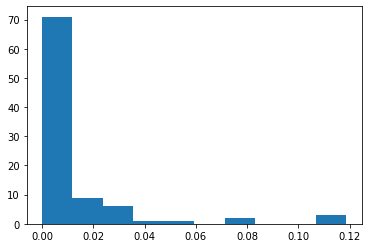

In [53]:
plt.hist(forest_importances)

## POS_SR,  svm

In [54]:
target_var = 'POS_SR'
features = var_list

scaler = StandardScaler()
model_svc = Pipeline(steps=[('scaler', scaler), ('svc', SVC(kernel='rbf', C=1.0, class_weight='balanced'))])
ML_trial = MLFramework(target_var=target_var, features=features, df=data)
ML_trial.standardFlow(model = model_svc, metric_CV='balanced_accuracy')

CV Score:  [0.35653499 0.33934187 0.34951684 0.36899462 0.30328   ]
Insample Result:  0.7759305210918114
Outsample Result:  0.32649071358748777
Remark: model is fitted with the whole trainning dataset 


In [55]:
params = dict(svc__C = np.arange(0.2,1.0,0.2), svc__kernel = ['poly','rbf','sigmoid'], svc__gamma = ['scale', 'auto'])
ML_trial.gridSearch_TS(parameters=params, metric_CV='balanced_accuracy')

Best param from Grid Search: {'svc__C': 0.4, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
CV score for the best param: 0.37040967633393945


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__gamma,param_svc__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.698188,0.609281,0.154906,0.117959,0.2,scale,poly,"{'svc__C': 0.2, 'svc__gamma': 'scale', 'svc__k...",0.310554,0.364342,0.333790,0.376949,0.417355,0.360598,0.036676,6
1,1.041460,0.611197,0.298416,0.085550,0.2,scale,rbf,"{'svc__C': 0.2, 'svc__gamma': 'scale', 'svc__k...",0.354228,0.338647,0.403236,0.345807,0.383388,0.365061,0.024409,3
2,0.831110,0.673882,0.151054,0.064374,0.2,scale,sigmoid,"{'svc__C': 0.2, 'svc__gamma': 'scale', 'svc__k...",0.328104,0.304791,0.398651,0.373358,0.379326,0.356846,0.034818,10
3,0.626942,0.502970,0.110345,0.046743,0.2,auto,poly,"{'svc__C': 0.2, 'svc__gamma': 'auto', 'svc__ke...",0.311599,0.363945,0.333852,0.378311,0.420870,0.361715,0.037597,5
4,0.850266,0.682657,0.222657,0.100600,0.2,auto,rbf,"{'svc__C': 0.2, 'svc__gamma': 'auto', 'svc__ke...",0.354809,0.329183,0.404293,0.345807,0.384518,0.363722,0.027099,4
5,0.821551,0.666269,0.150140,0.065254,0.2,auto,sigmoid,"{'svc__C': 0.2, 'svc__gamma': 'auto', 'svc__ke...",0.328104,0.308108,0.387342,0.370090,0.360725,0.350874,0.028788,16
6,0.617152,0.492300,0.107432,0.047512,0.4,scale,poly,"{'svc__C': 0.4, 'svc__gamma': 'scale', 'svc__k...",0.304972,0.352713,0.322095,0.378665,0.388846,0.349458,0.032071,18
7,0.825359,0.641285,0.220483,0.104265,0.4,scale,rbf,"{'svc__C': 0.4, 'svc__gamma': 'scale', 'svc__k...",0.357589,0.335536,0.389188,0.364768,0.404968,0.370410,0.024328,1
8,0.796985,0.645234,0.146940,0.060620,0.4,scale,sigmoid,"{'svc__C': 0.4, 'svc__gamma': 'scale', 'svc__k...",0.324617,0.309088,0.386065,0.397727,0.362279,0.355955,0.034264,12
9,0.630627,0.495092,0.112504,0.053094,0.4,auto,poly,"{'svc__C': 0.4, 'svc__gamma': 'auto', 'svc__ke...",0.306716,0.350674,0.328374,0.386228,0.394496,0.353298,0.033406,15


In [56]:
target_var = 'POS_SR'
features = var_list

scaler = StandardScaler()
model_svc = Pipeline(steps=[('scaler', scaler), ('svc', SVC(kernel='rbf', C=0.4, gamma='scale', class_weight='balanced'))])
ML_trial = MLFramework(target_var=target_var, features=features, df=data)
ML_trial.standardFlow(model = model_svc)

CV Score:  [0.25484352 0.30402385 0.32041729 0.29955291 0.36214605]
Insample Result:  0.6712158808933002
Outsample Result:  0.26099706744868034
Remark: model is fitted with the whole trainning dataset 


# Confusion Matrix

In [58]:
def plot_ConfusionMatrix(model, X, y, split_date='2018-01-01'):
  X_train, y_train = X[X.index<split_date], y[y.index<split_date]
  X_test, y_test = X[X.index>split_date], y[y.index>split_date]

  disp1 = ConfusionMatrixDisplay.from_estimator(model, X_train, y_train, cmap=plt.cm.Blues,)
  print("Insample: ")
  print(disp1.confusion_matrix)

  disp2 = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues,)
  print("Outsample: ")
  print(disp2.confusion_matrix)

CV Score:  [0.32983663 0.41201416 0.37082493 0.34339135 0.28967055]
Insample Result:  0.6044665012406948
Outsample Result:  0.4052734375
Remark: model is fitted with the whole trainning dataset 
Insample: 
[[ 870  171  318]
 [ 290  453  270]
 [ 367  178 1113]]
Outsample: 
[[  8  79 224]
 [ 10  36 158]
 [ 21 117 371]]


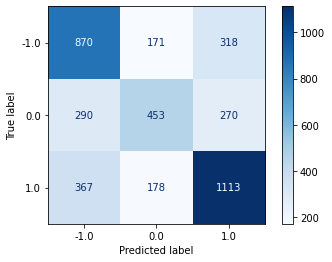

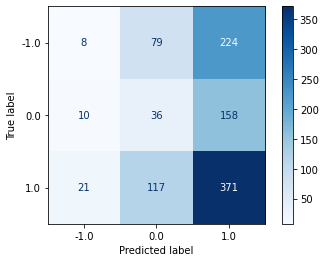

In [ ]:
target_var = 'POS_SR'
features = var_list

scaler = StandardScaler()
model_svc = Pipeline(steps = [('scaler', scaler), ('svc', SVC(kernel='poly', C=0.8, gamma='scale', class_weight='balanced'))])
ML_trial2 = MLFramework(target_var=target_var, features=features, df=data)
ML_trial2.standardFlow(model = model_svc, metric_CV='balanced_accuracy')

# y1 = y[target_var]
# X_train, y_train = X[X.index<'2018-01-01'], y1[y1.index<'2018-01-01']
# X_test, y_test = X[X.index>'2018-01-01'], y1[y1.index>'2018-01-01']
# disp = ConfusionMatrixDisplay.from_estimator(model_svc, X_test, y_test, cmap=plt.cm.Blues,)
# disp.confusion_matrix
plot_ConfusionMatrix(model_svc, X, y[target_var])

In [ ]:
# disp2 = ConfusionMatrixDisplay.from_estimator(model_svc, X_train, y_train, cmap=plt.cm.Blues,)
# disp2.confusion_matrix

CV Score:  [0.31730255 0.32433123 0.33333333 0.3218618  0.28982737]
Insample Result:  0.4947890818858561
Outsample Result:  0.4873046875
Remark: model is fitted with the whole trainning dataset 
Insample: 
[[ 451    0  908]
 [ 209   19  785]
 [ 128    6 1524]]
Outsample: 
[[  0   6 305]
 [  0   1 203]
 [  0  11 498]]


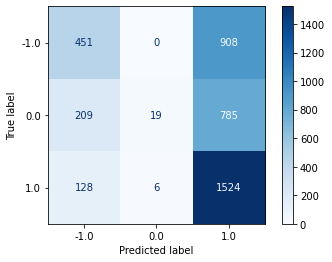

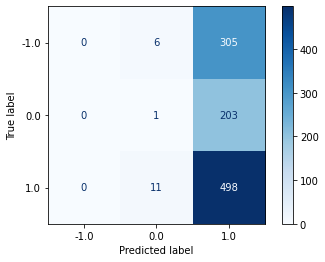

In [ ]:
scaler = StandardScaler()
model_rnf = Pipeline(steps = [('scaler', scaler), ('rnf', RandomForestClassifier(n_estimators=20, max_depth=3))])
ML_trial = MLFramework(target_var=target_var, features=features, df=data)
ML_trial.standardFlow(model = model_rnf, metric_CV='balanced_accuracy')

# y1 = y[target_var]
# X_train, y_train = X[X.index<'2018-01-01'], y1[y1.index<'2018-01-01']
# X_test, y_test = X[X.index>'2018-01-01'], y1[y1.index>'2018-01-01']
# disp = ConfusionMatrixDisplay.from_estimator(model_rnf, X_test, y_test, cmap=plt.cm.Blues,)
# disp.confusion_matrix

plot_ConfusionMatrix(model_rnf, X, y[target_var])

In [ ]:
# disp4 = ConfusionMatrixDisplay.from_estimator(model_rnf, X_train, y_train, cmap=plt.cm.Blues,)
# disp4.confusion_matrix

overfitting

CV Score:  [0.32763463 0.37243758 0.33143962 0.34668894 0.3897185 ]
Insample Result:  0.8498759305210918
Outsample Result:  0.4716796875
Remark: model is fitted with the whole trainning dataset 
Insample: 
[[1222   51   86]
 [ 162  757   94]
 [ 154   58 1446]]
Outsample: 
[[  1  22 288]
 [  0   9 195]
 [  0  36 473]]


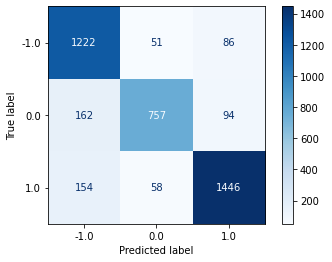

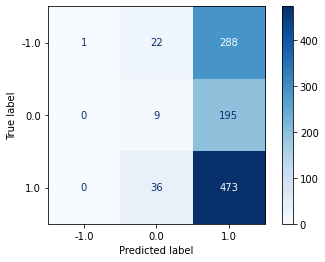

In [ ]:
scaler = StandardScaler()
model_rnf = Pipeline(steps = [('scaler', scaler), ('rnf', RandomForestClassifier(n_estimators=50, max_depth=8, class_weight='balanced'))])
ML_trial = MLFramework(target_var=target_var, features=features, df=data)
ML_trial.standardFlow(model = model_rnf, metric_CV='balanced_accuracy')

# y1 = y[target_var]
# X_test, y_test = X[X.index>'2018-01-01'], y1[y1.index>'2018-01-01']
# disp = ConfusionMatrixDisplay.from_estimator(model_rnf, X_test, y_test, cmap=plt.cm.Blues,)
# disp.confusion_matrix

plot_ConfusionMatrix(model_rnf, X, y[target_var])

setting class_weight='balanced' do help improve insample results.

1. check label with backtest, duration, compute return  ✔
2. feature importance  ✔
3. feature pca transform, add duration feature  
4. try with hmm label  
5. define score  
6. model param: class_weight "balanced"  ✔

change label (ma), hmm label  
features: new features, rescale, transform(pca), trend-cycle-error  
